In [292]:
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from shapely.geometry import Point



from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer




In [299]:
import warnings
warnings.filterwarnings("ignore")

In [407]:
hourlydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi_cpcb_2022.nc')
df1=hourlydata.to_dataframe()
#print(df1)
#df1.dropna(subset=['PM2.5'],inplace=True)

df1.reset_index(inplace=True)
df1.columns = df1.columns.str.lower()
print(df1.shape)
df1 = df1[df1['time'].dt.year != 2023]
df1.rename(columns={'time':'date','pm2.5':'pm25','ozone':'o3'}, inplace=True)
print(df1.shape)
print(df1.columns)
print(df1.dtypes)

(351320, 25)
(350400, 25)
Index(['station', 'date', 'from date', 'to date', 'pm25', 'pm10', 'no', 'no2',
       'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene', 'rh', 'ws', 'wd',
       'sr', 'bp', 'at', 'rf', 'tot-rf', 'latitude', 'longitude'],
      dtype='object')
station              object
date         datetime64[ns]
from date    datetime64[ns]
to date      datetime64[ns]
pm25                float64
pm10                float64
no                  float64
no2                 float64
nox                 float64
nh3                 float64
so2                 float64
co                  float64
o3                  float64
benzene             float64
toluene             float64
rh                  float64
ws                  float64
wd                  float64
sr                  float64
bp                  float64
at                  float64
rf                  float64
tot-rf              float64
latitude            float64
longitude           float64
dtype: object


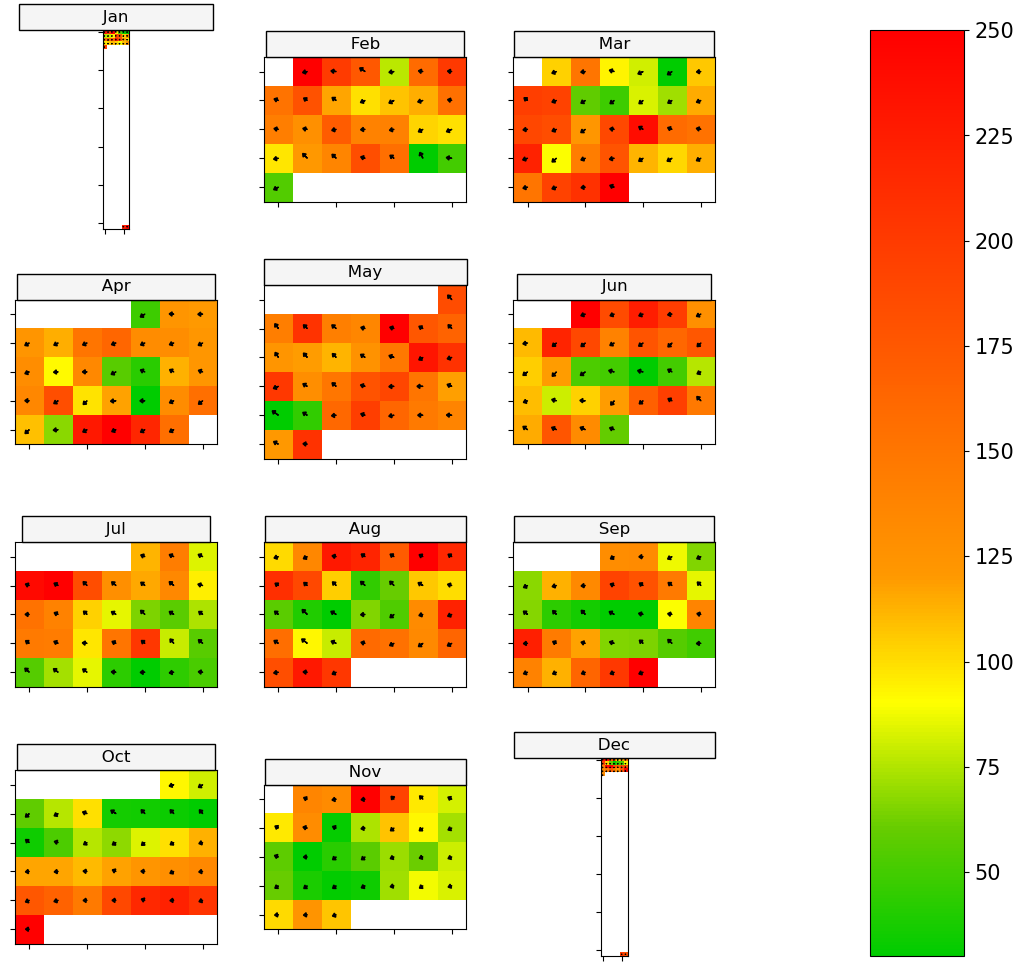

In [297]:
from vayu.calendarPlot  import calendarPlot
#print(df1.columns)

calendarPlot(df1, 'pm25', '2022','India')

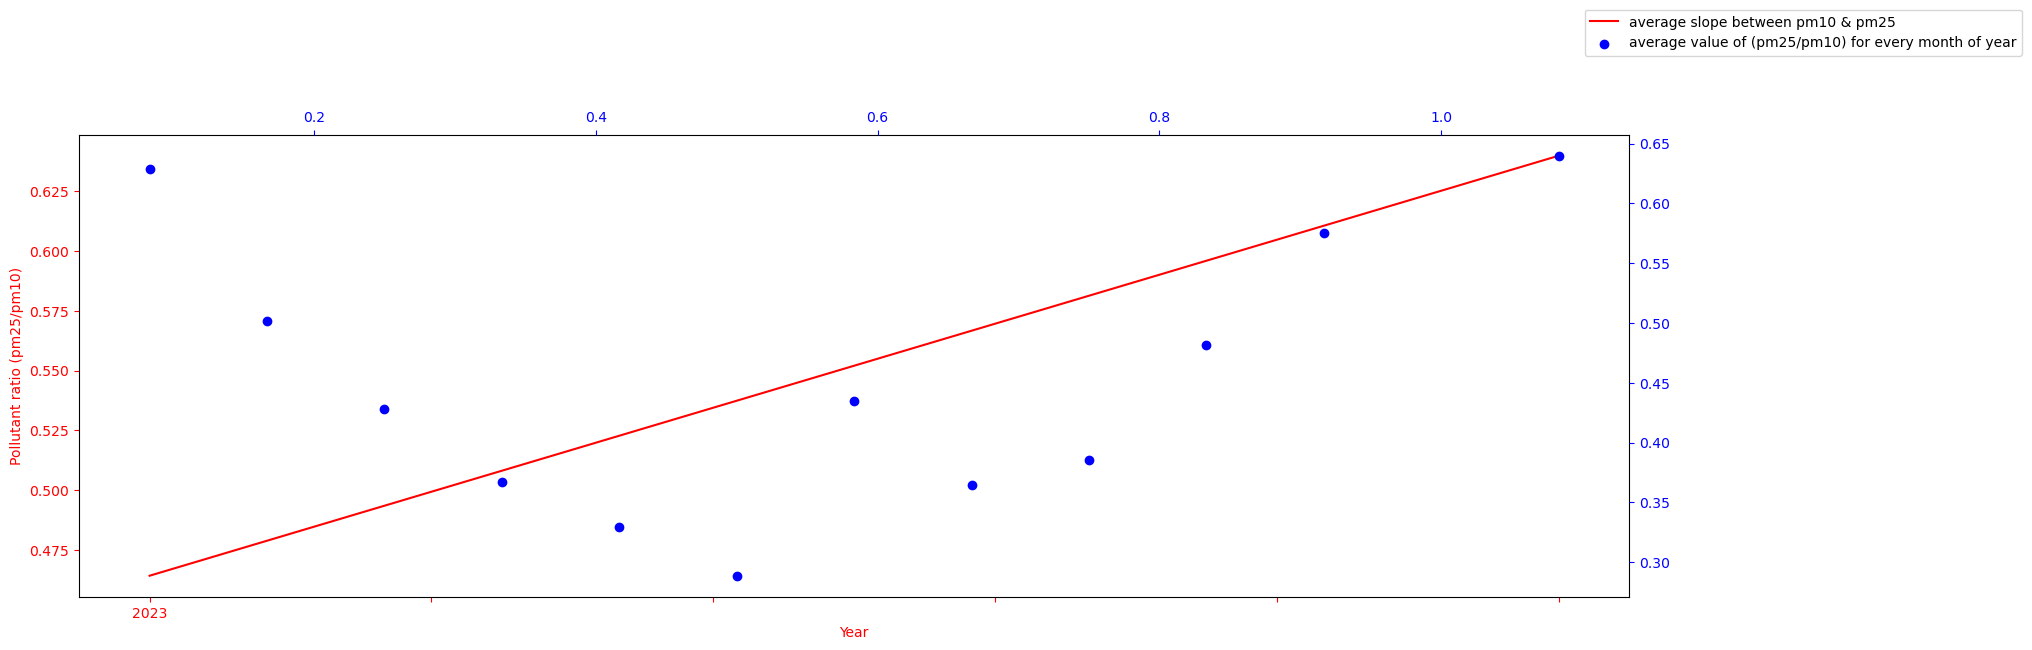

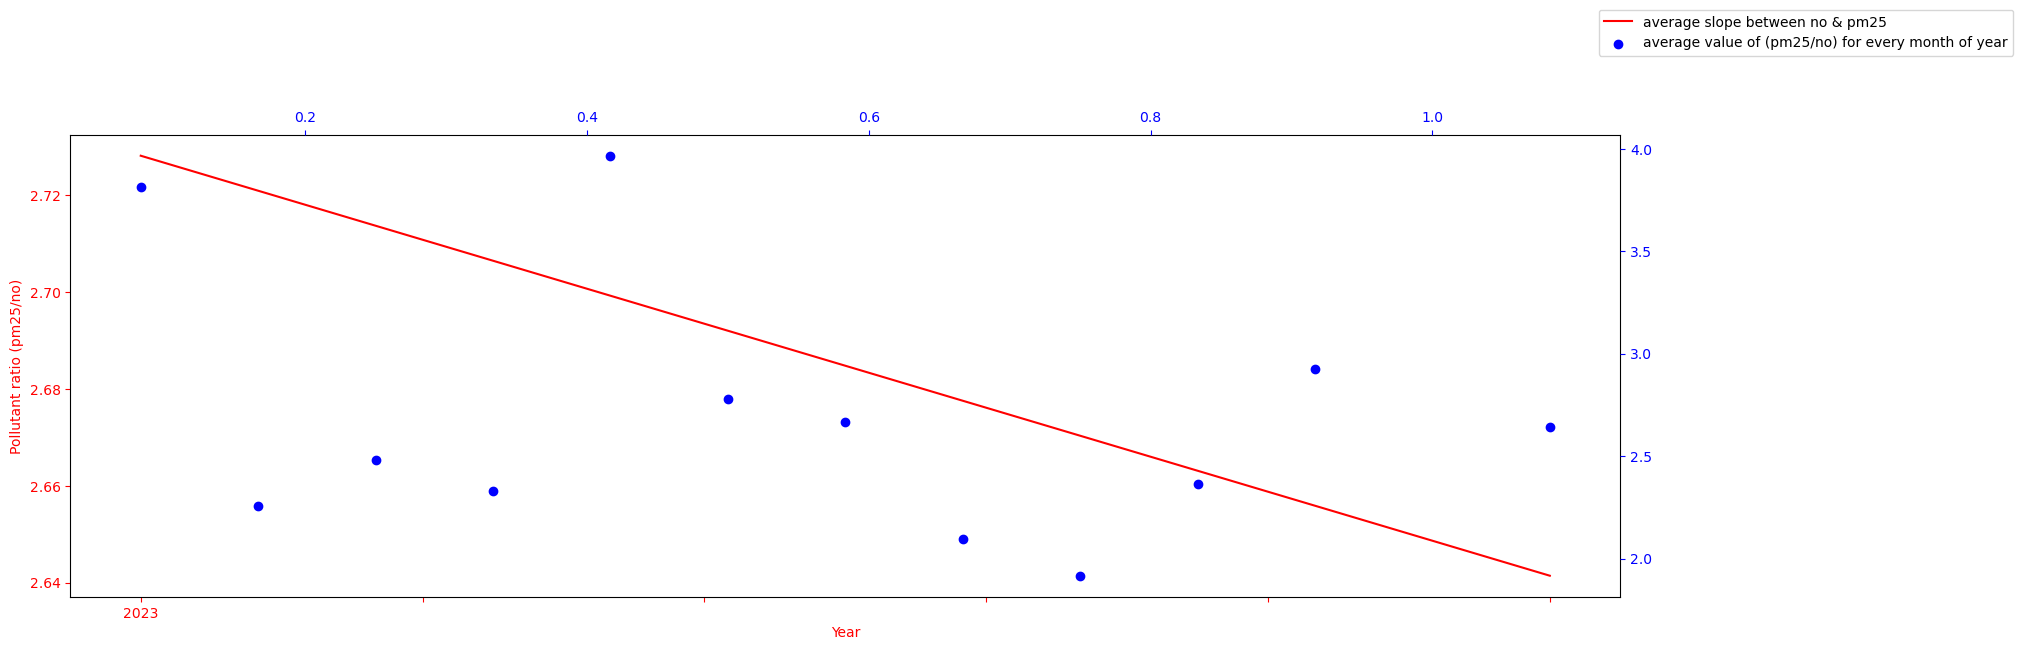

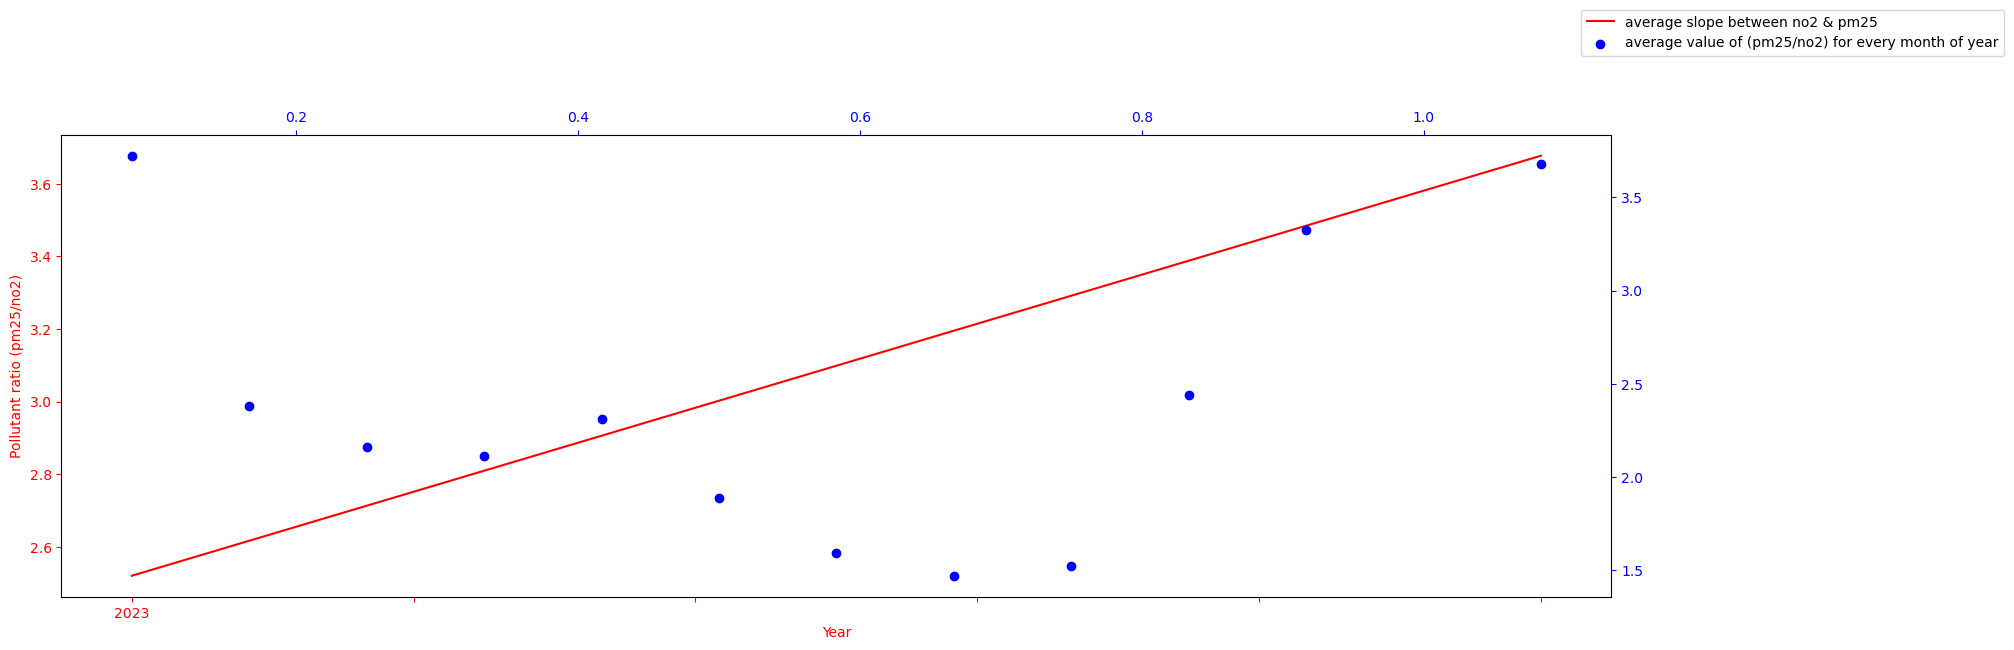

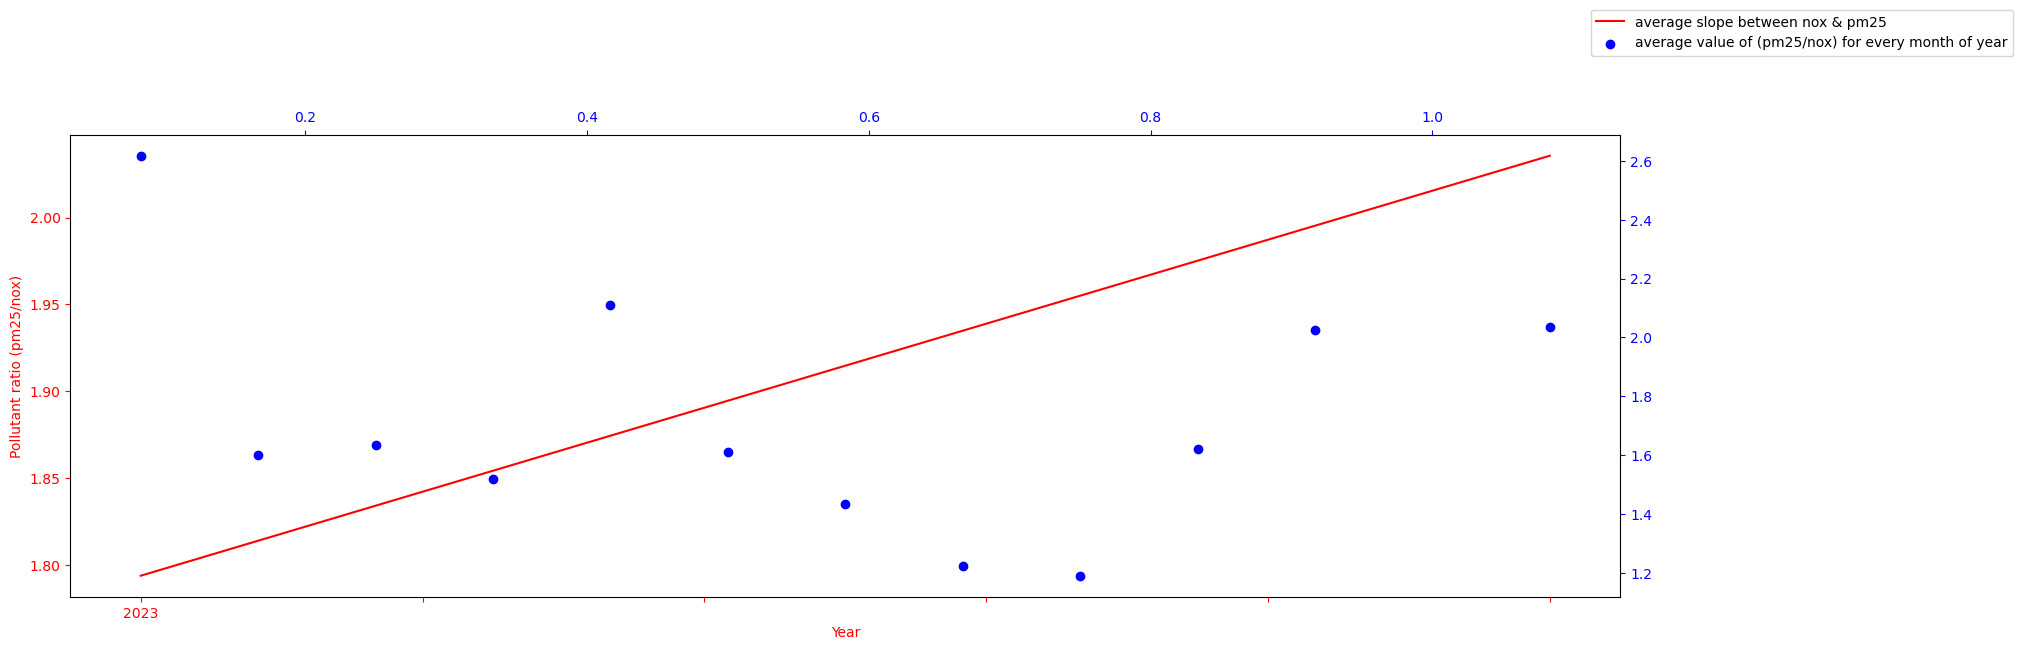

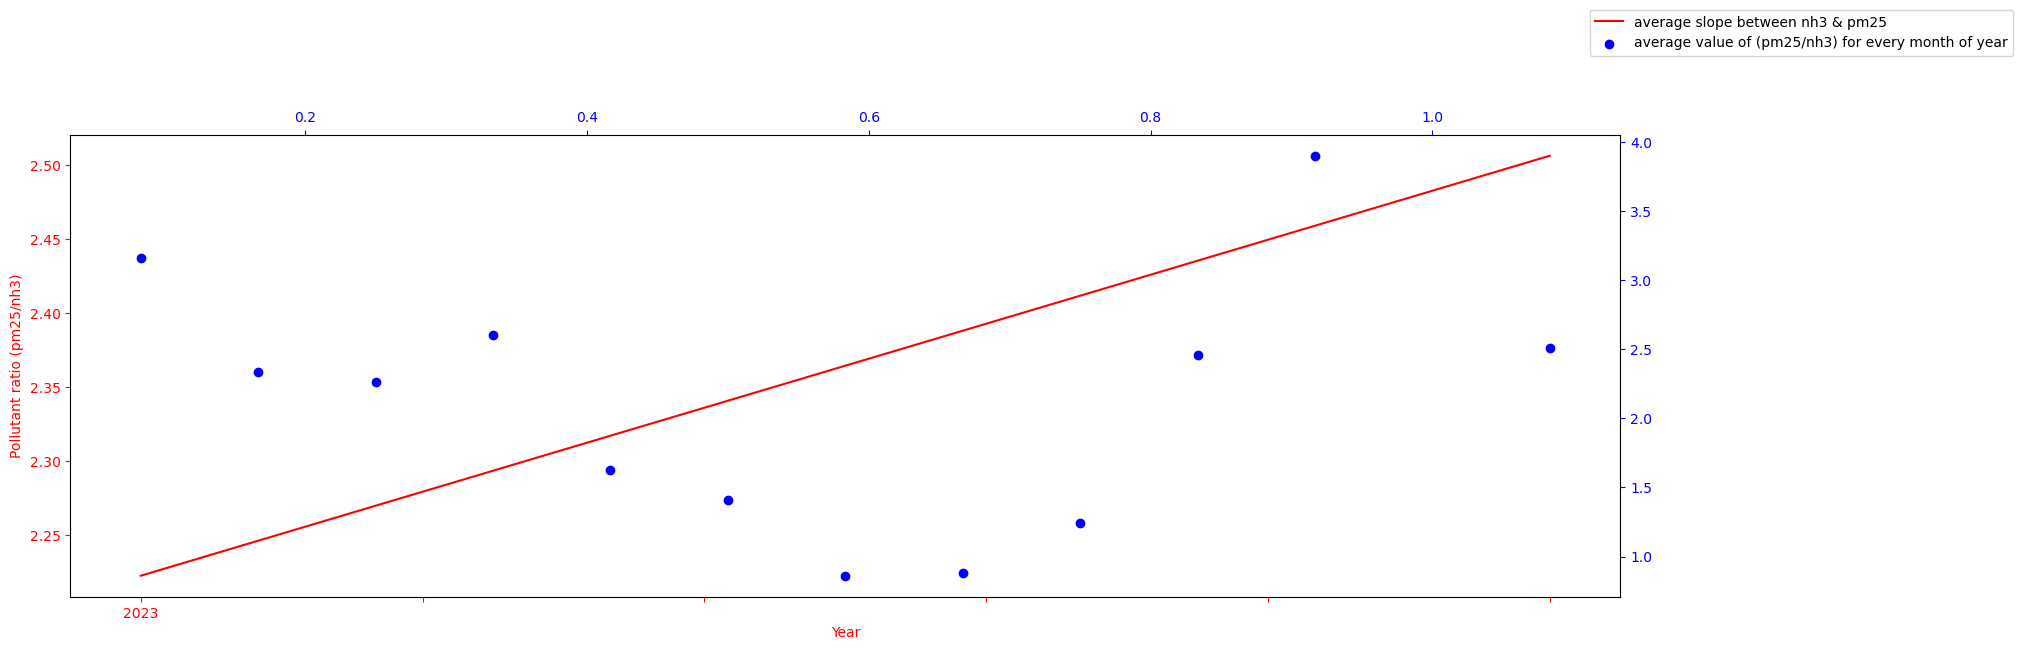

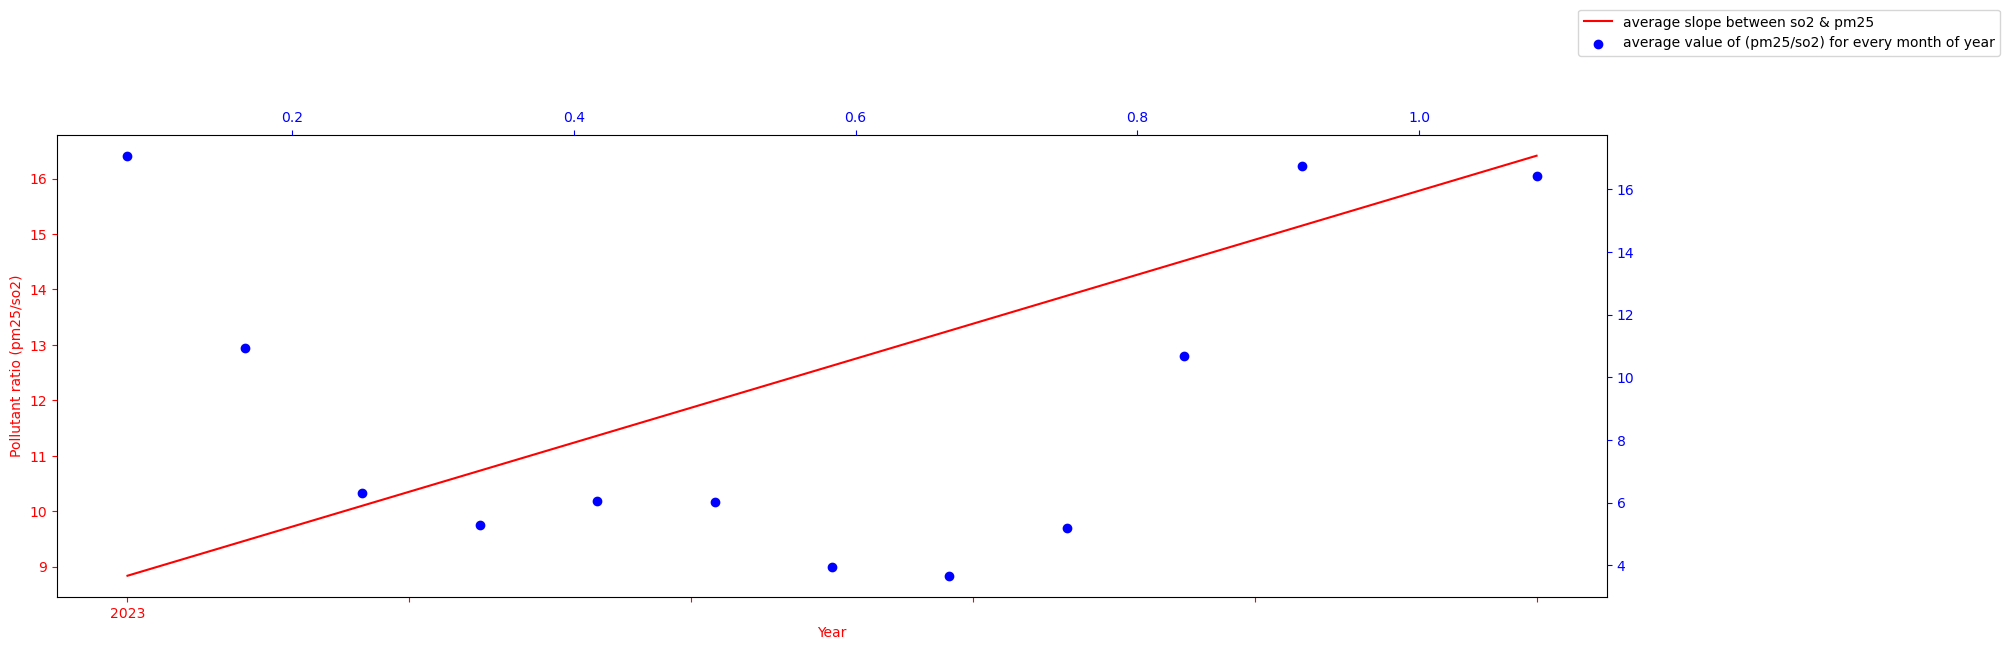

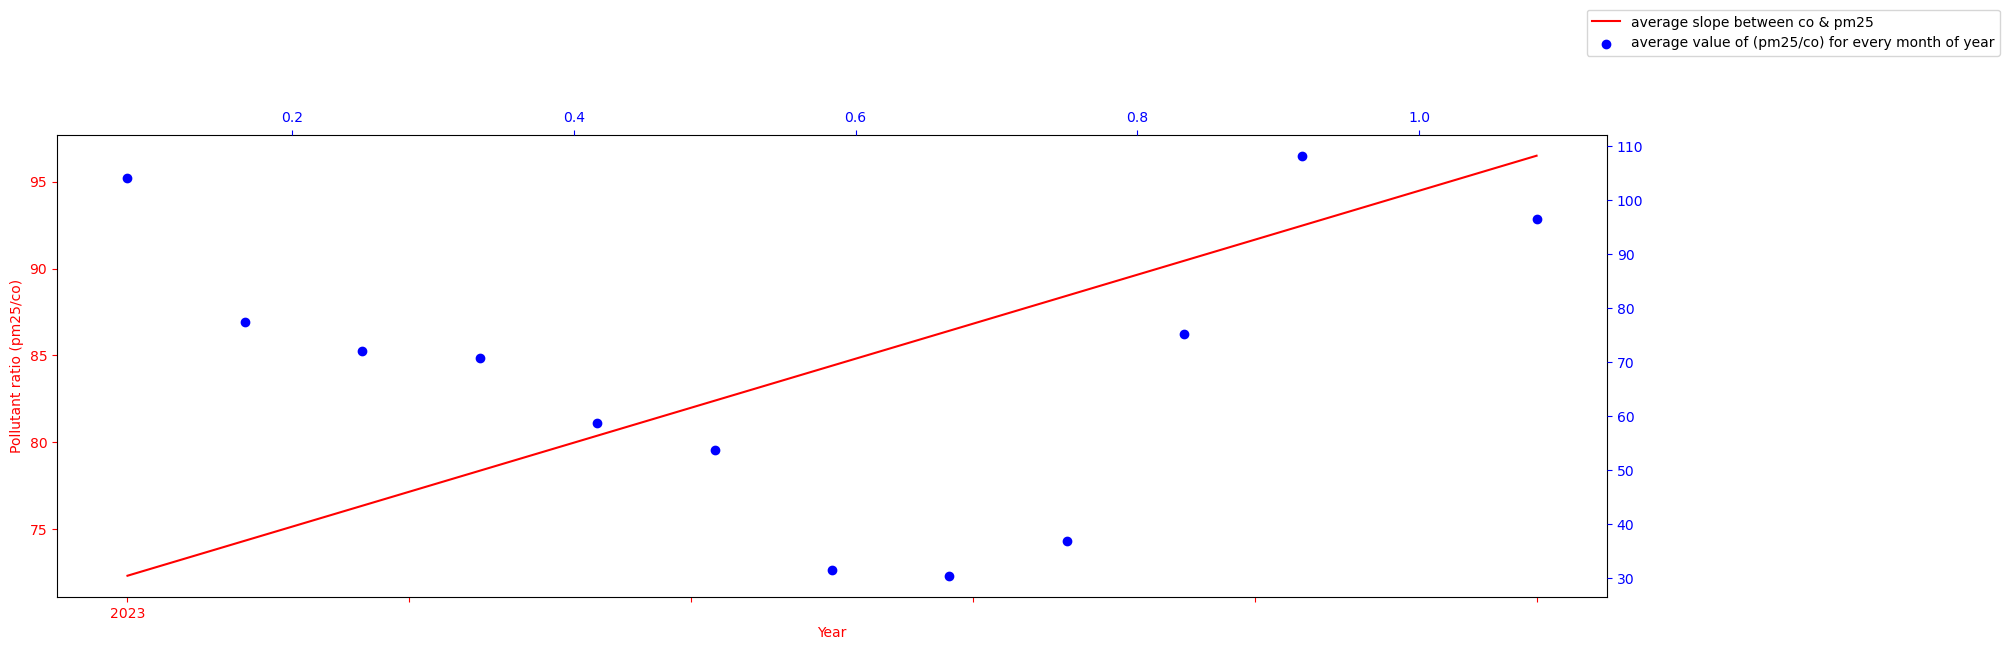

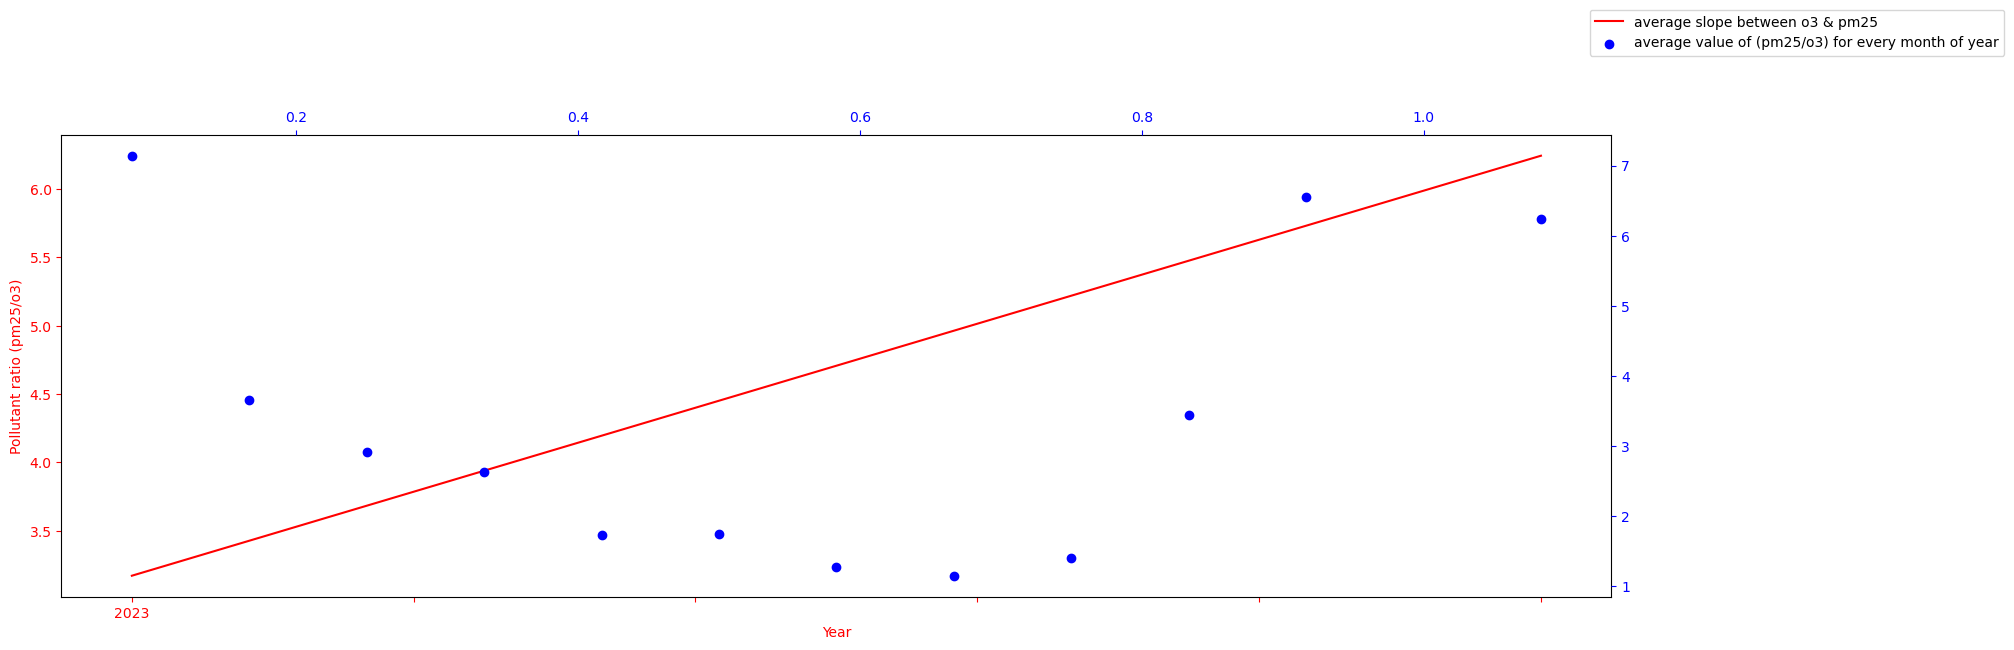

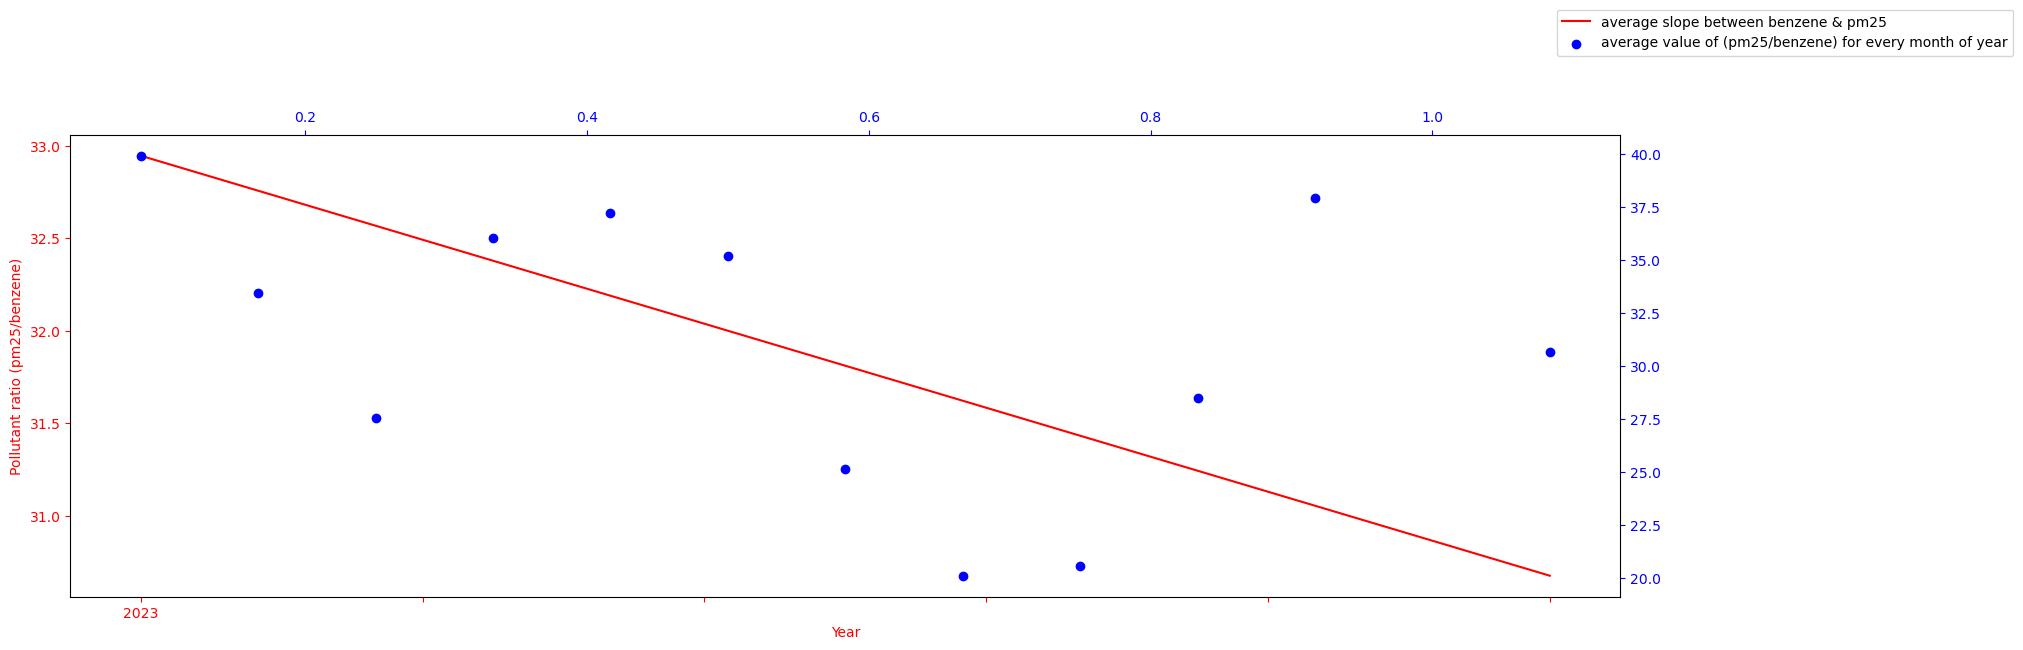

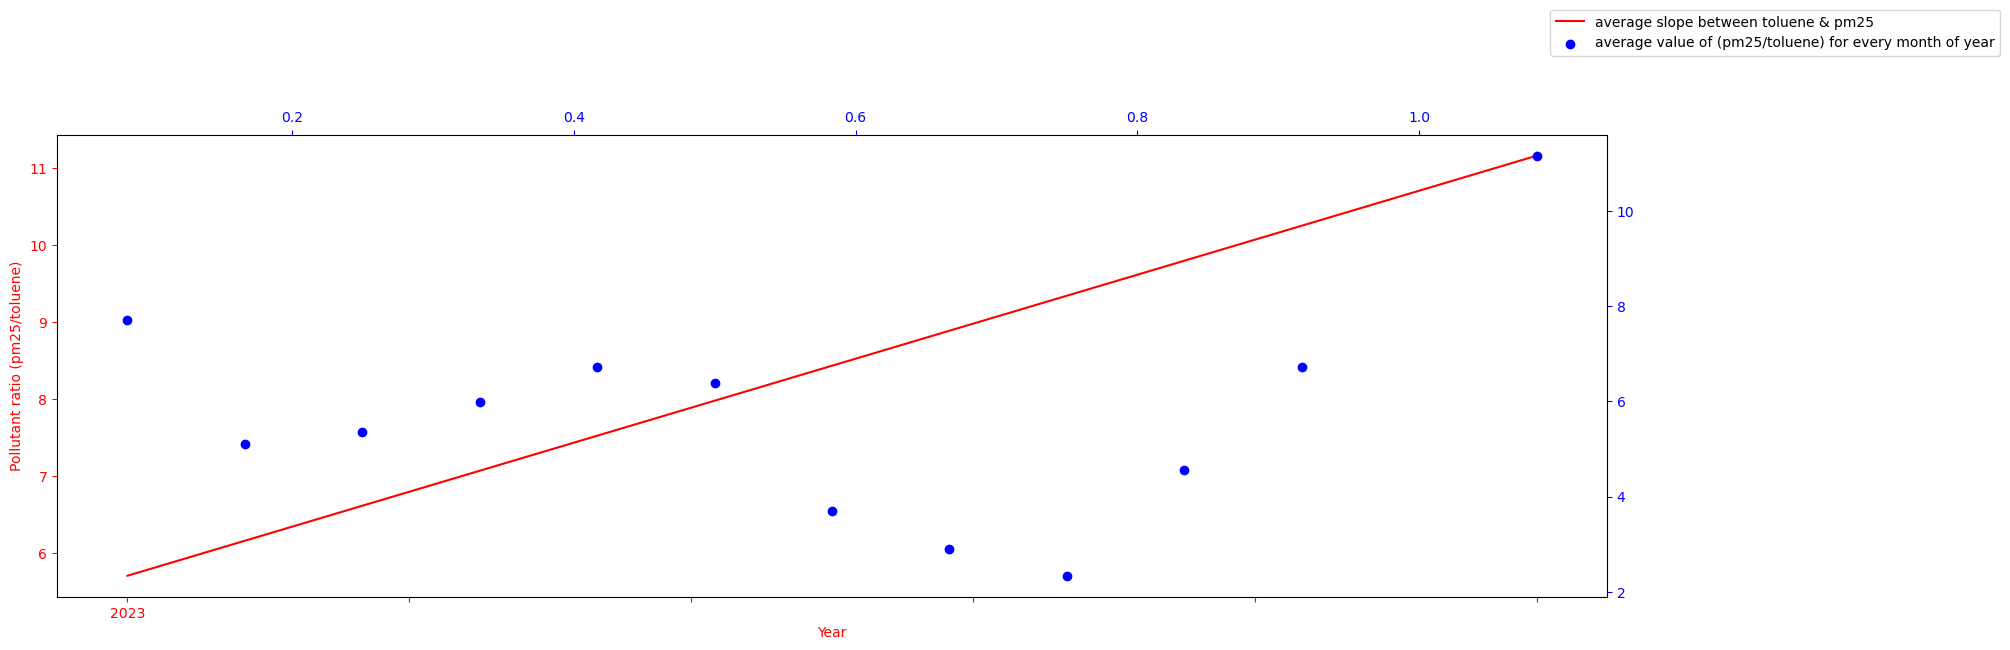

In [410]:
import warnings
warnings.filterwarnings("ignore")
from vayu.linearRelation import linearRelation

hourlydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi_cpcb_2022.nc')
df1=hourlydata.to_dataframe()
df1.columns = df1.columns.str.lower()
df1.reset_index(inplace=True)

df1.rename(columns={'time':'date','pm2.5':'pm25','ozone':'o3'}, inplace=True)

pollutants = ['pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene']

for i, pollutant in enumerate(pollutants):
   
    linearRelation(df1, pollutant, 'pm25' )  
 



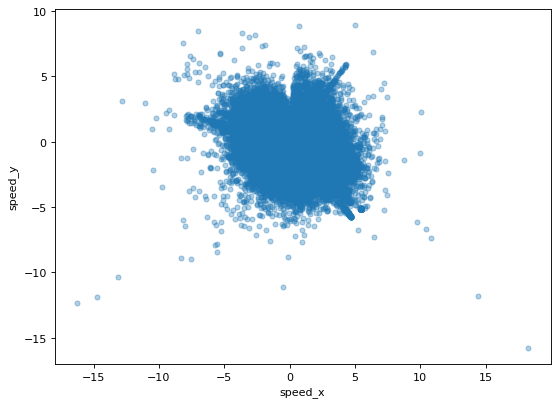

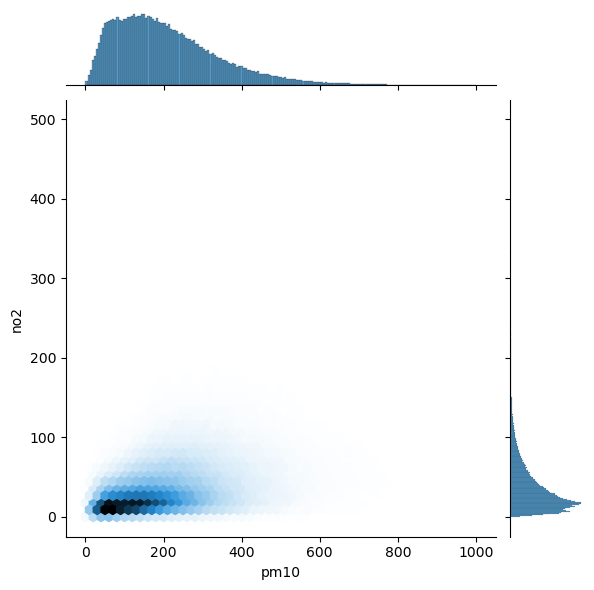

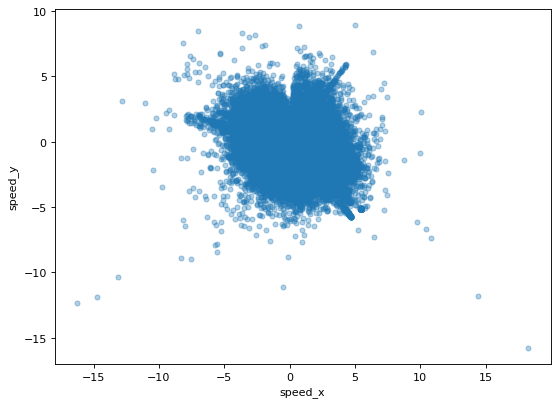

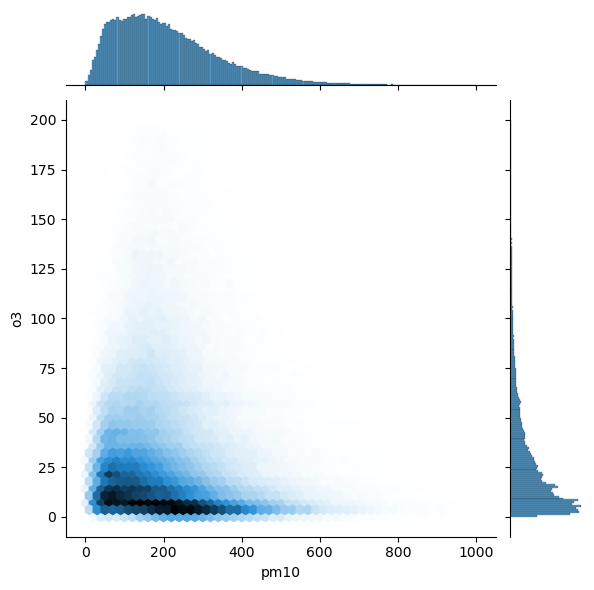

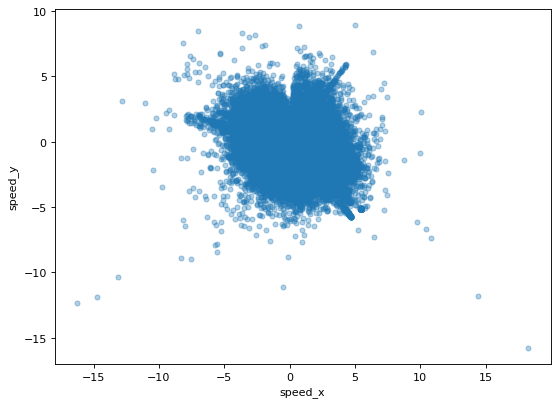

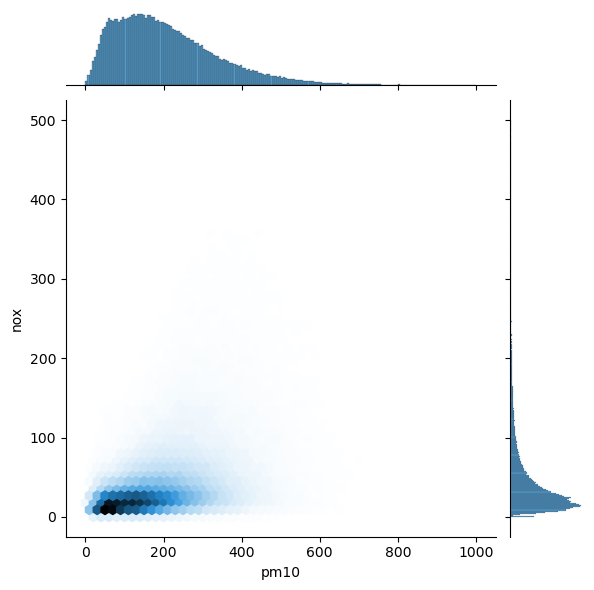

In [399]:
from vayu.scatterPlot import scatterPlot


pollutants=['no2','o3','nox']

for pollutant in pollutants:
    scatterPlot(df1, 'pm10', pollutant)

In [310]:
from vayu.selectByDate import selectByDate

selectByDate(df1, '2022')

                  pm25        pm10          no        no2         nox  \
date                                                                    
2022-01-01  238.687166  358.065241   80.337637  52.631954   99.920048   
2022-01-02  265.113602  388.734755   84.815212  54.097189  106.583741   
2022-01-03  246.690588  379.471355   78.686843  57.746209  103.008186   
2022-01-04  220.814845  355.592155   95.001818  62.629853  119.700979   
2022-01-05  265.961611  367.176745  100.905658  54.804629  116.755135   
...                ...         ...         ...        ...         ...   
2022-12-27  166.803104  247.662655   27.552520  38.319026   49.842360   
2022-12-28  151.840385  252.170215   36.744450  39.485789   59.716260   
2022-12-29  196.728196  327.455279   37.512661  51.180549   69.227281   
2022-12-30  256.684902  391.923736   41.709488  43.440945   67.501556   
2022-12-31  156.237429  240.665221   26.954150  30.518813   43.451647   

                  nh3        so2        co        

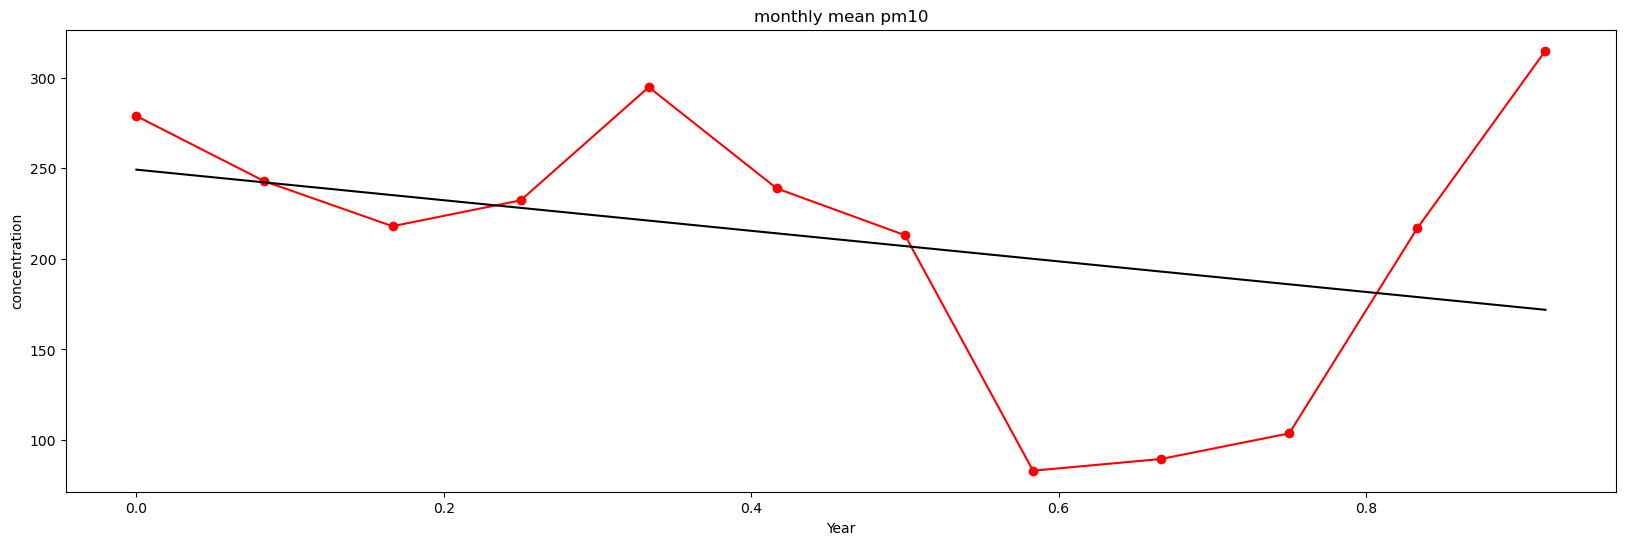

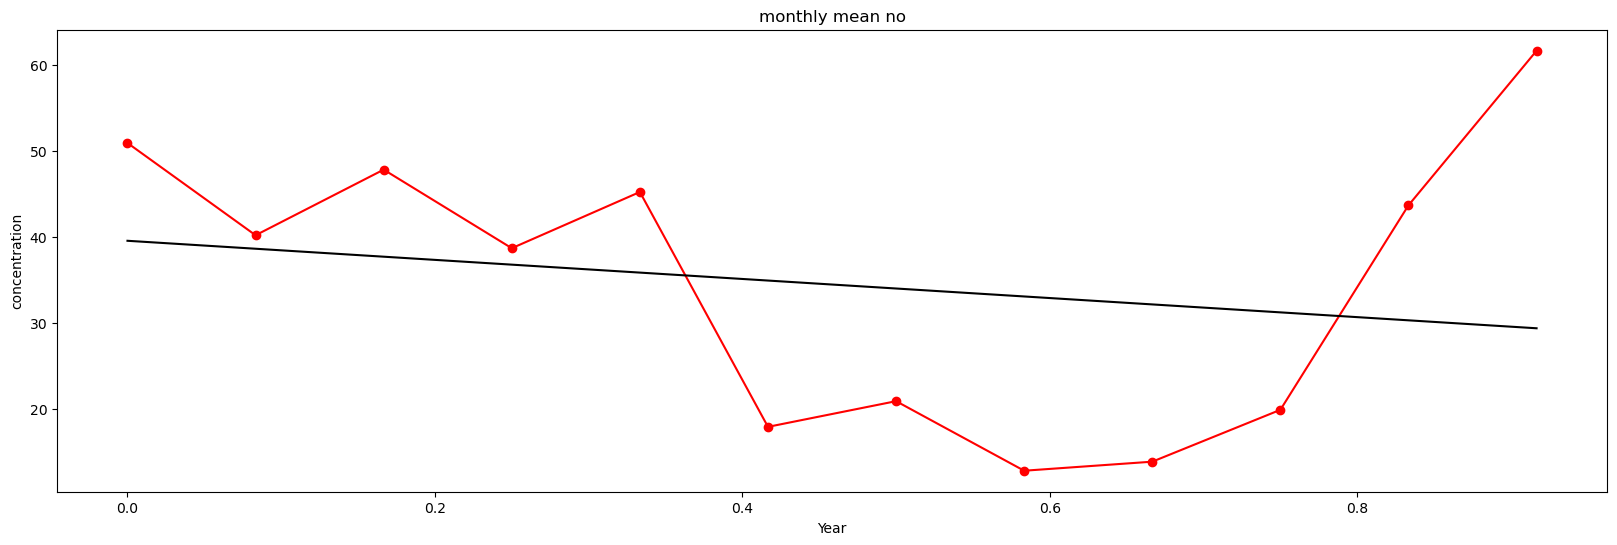

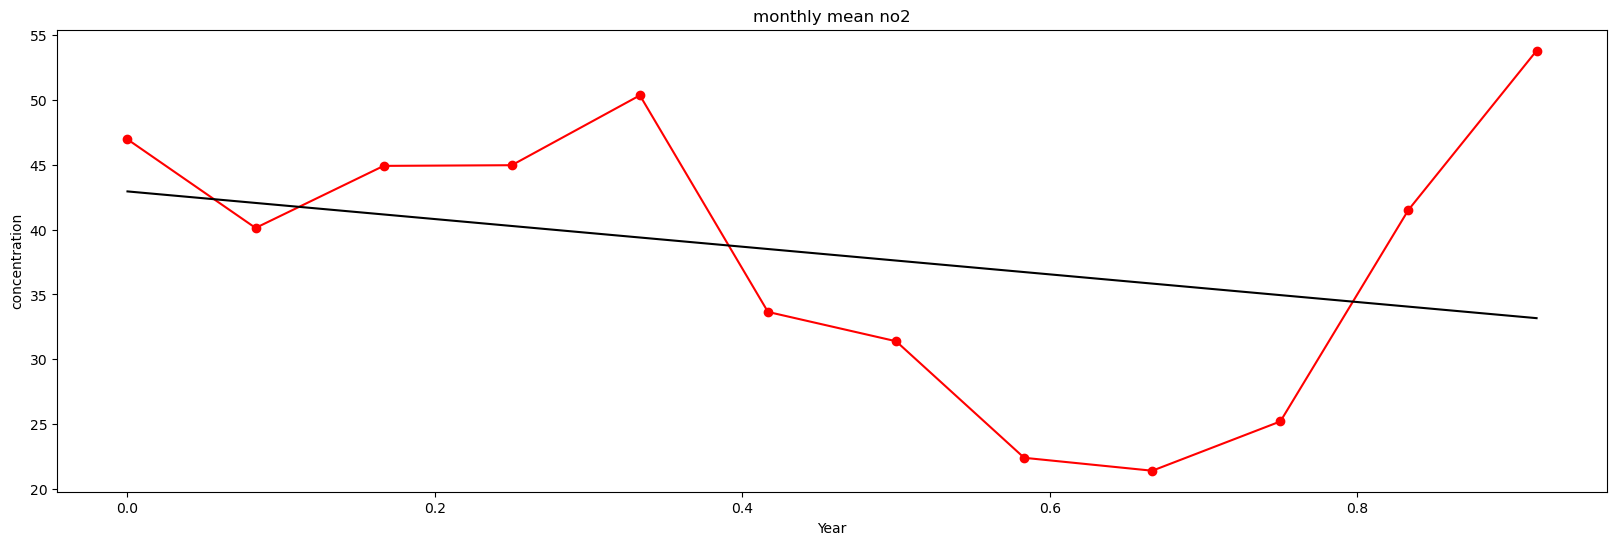

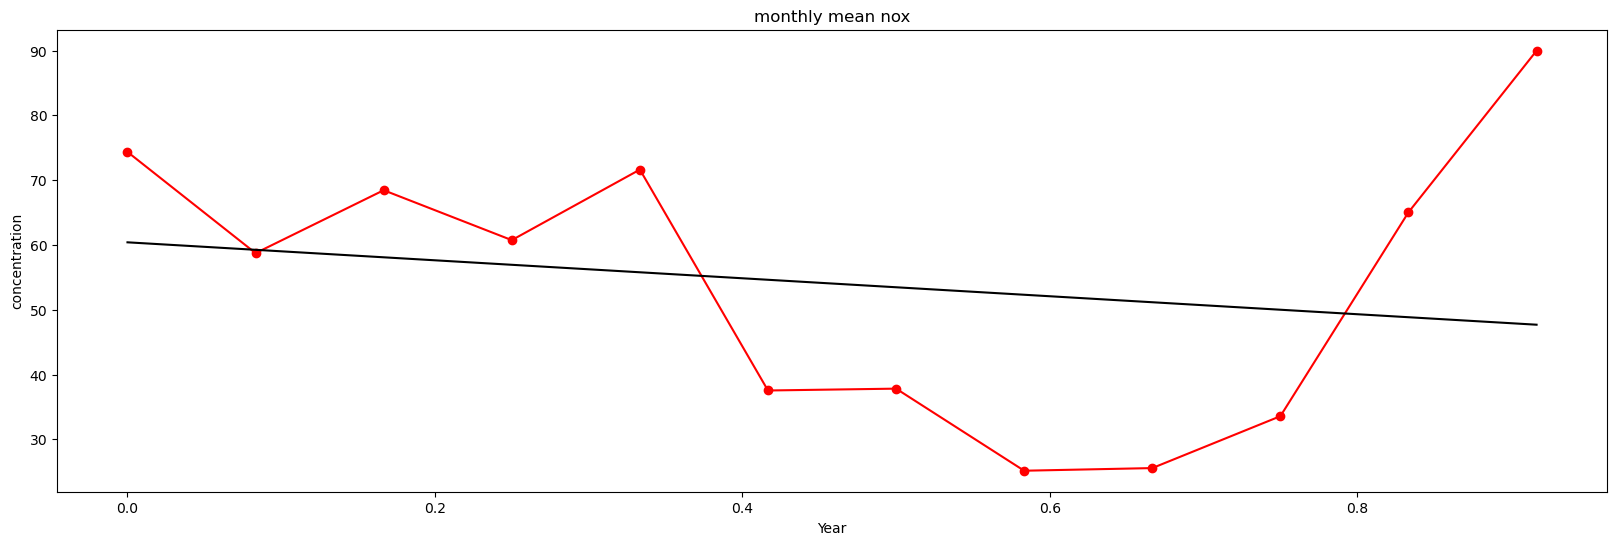

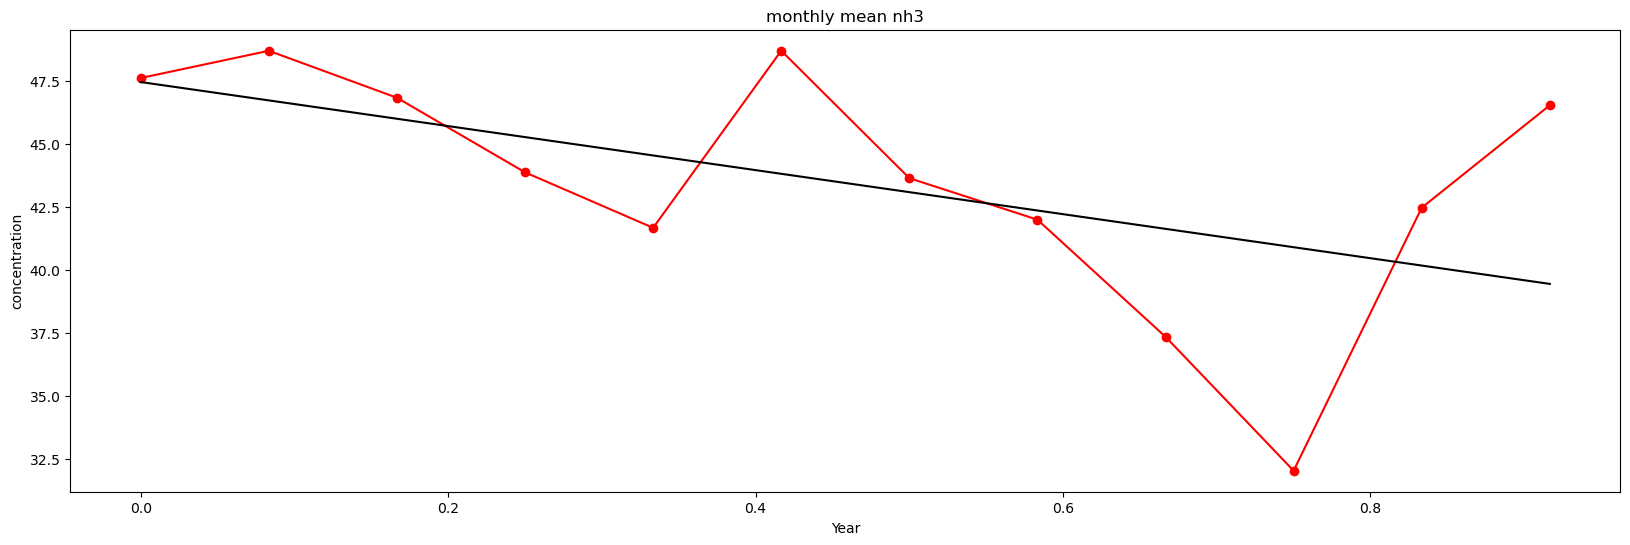

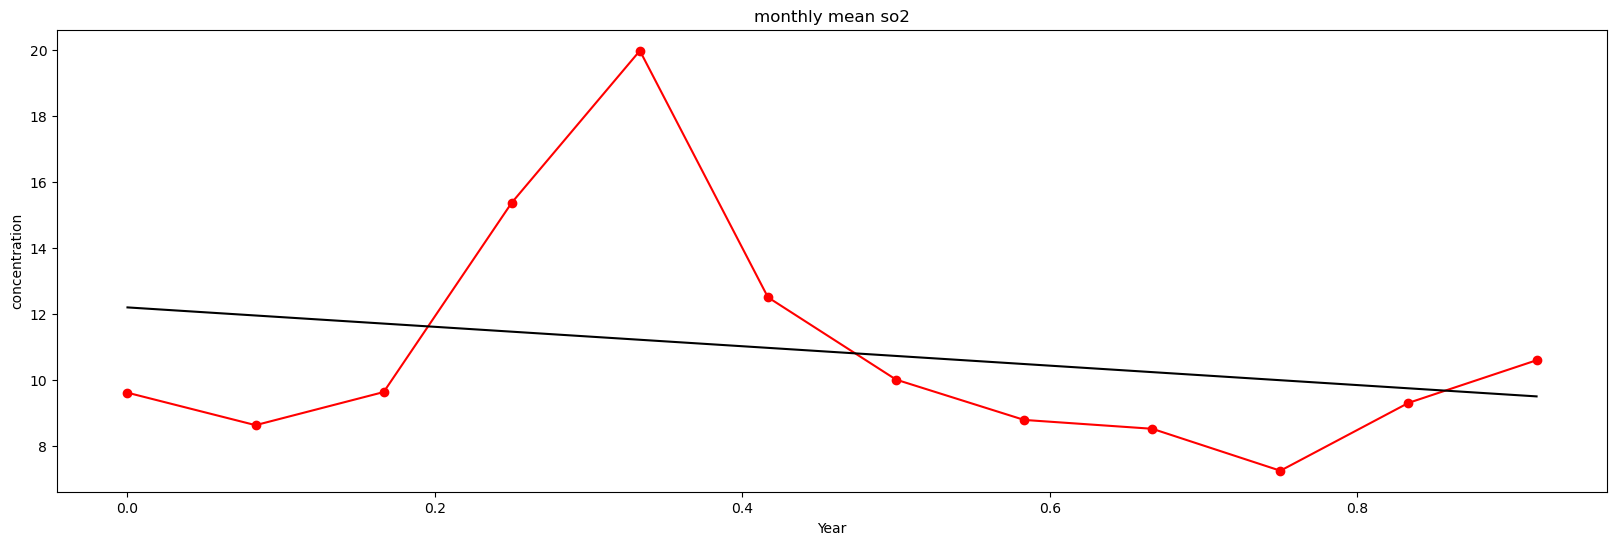

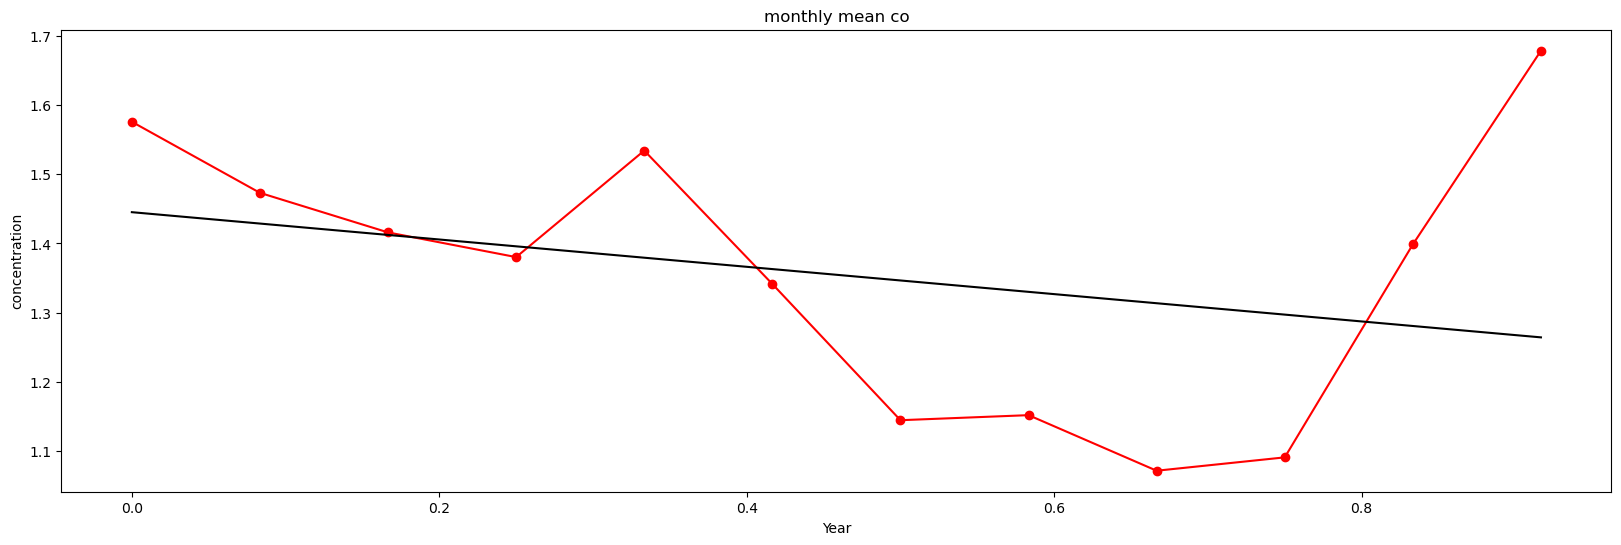

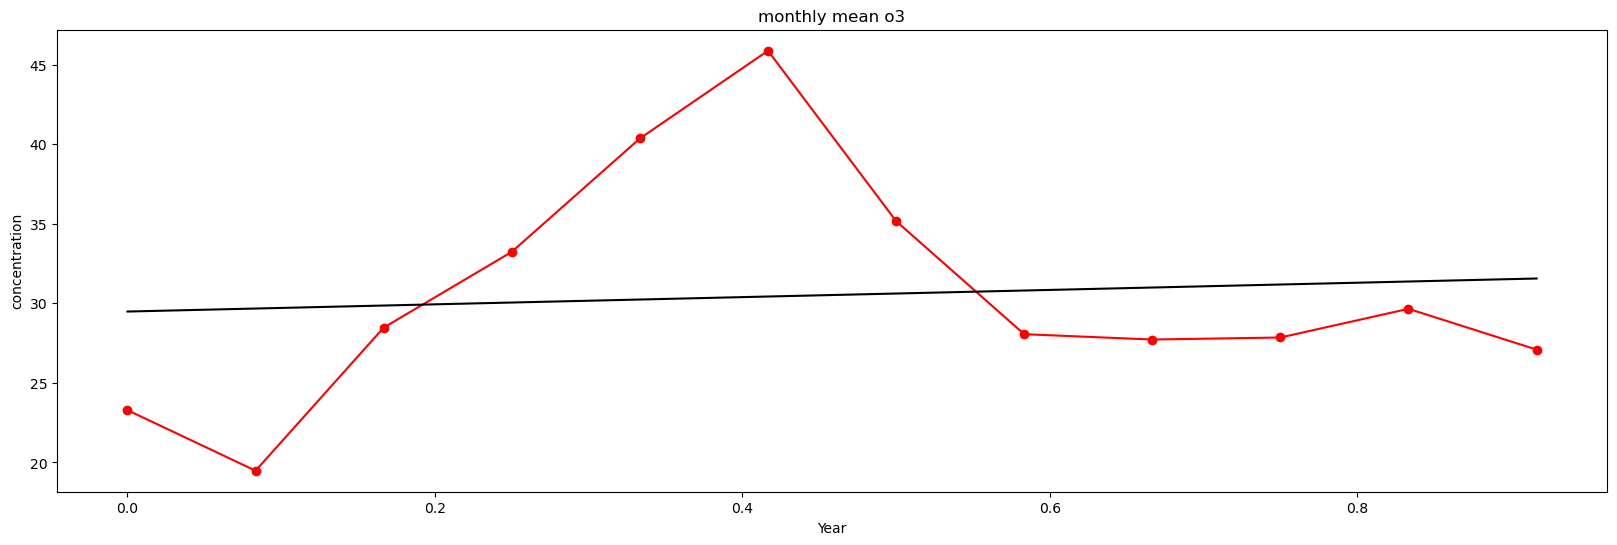

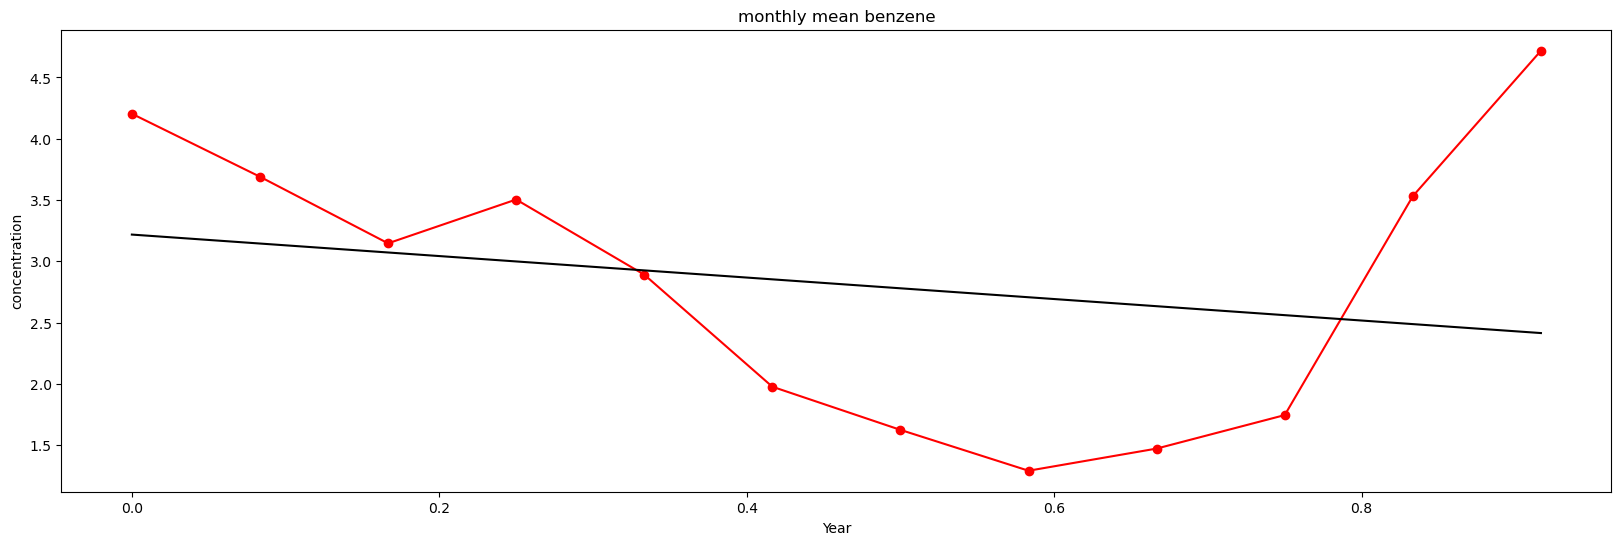

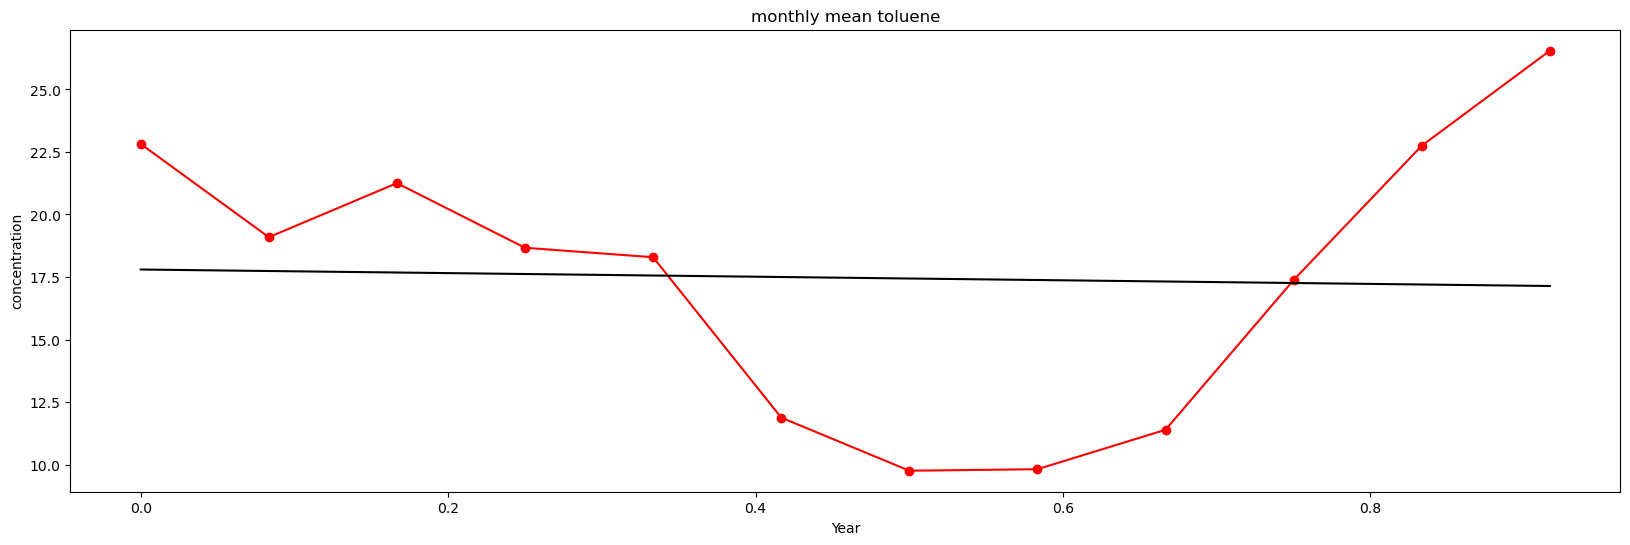

In [321]:
from vayu.smoothTrend import smoothTrend

pollutants = ['pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene']
for i, pollutant in enumerate(pollutants):
   
    smoothTrend(df1,pollutant, 1 ) 
    
# smoothTrend(df1, 'pm25', 1)
# smoothTrend(df1, 'pm25', 2)

Index(['station', 'date', 'from date', 'to date', 'pm25', 'pm10', 'no', 'no2',
       'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene', 'rh', 'ws', 'wd',
       'sr', 'bp', 'at', 'rf', 'tot-rf', 'latitude', 'longitude'],
      dtype='object')


KeyError: 'nox'

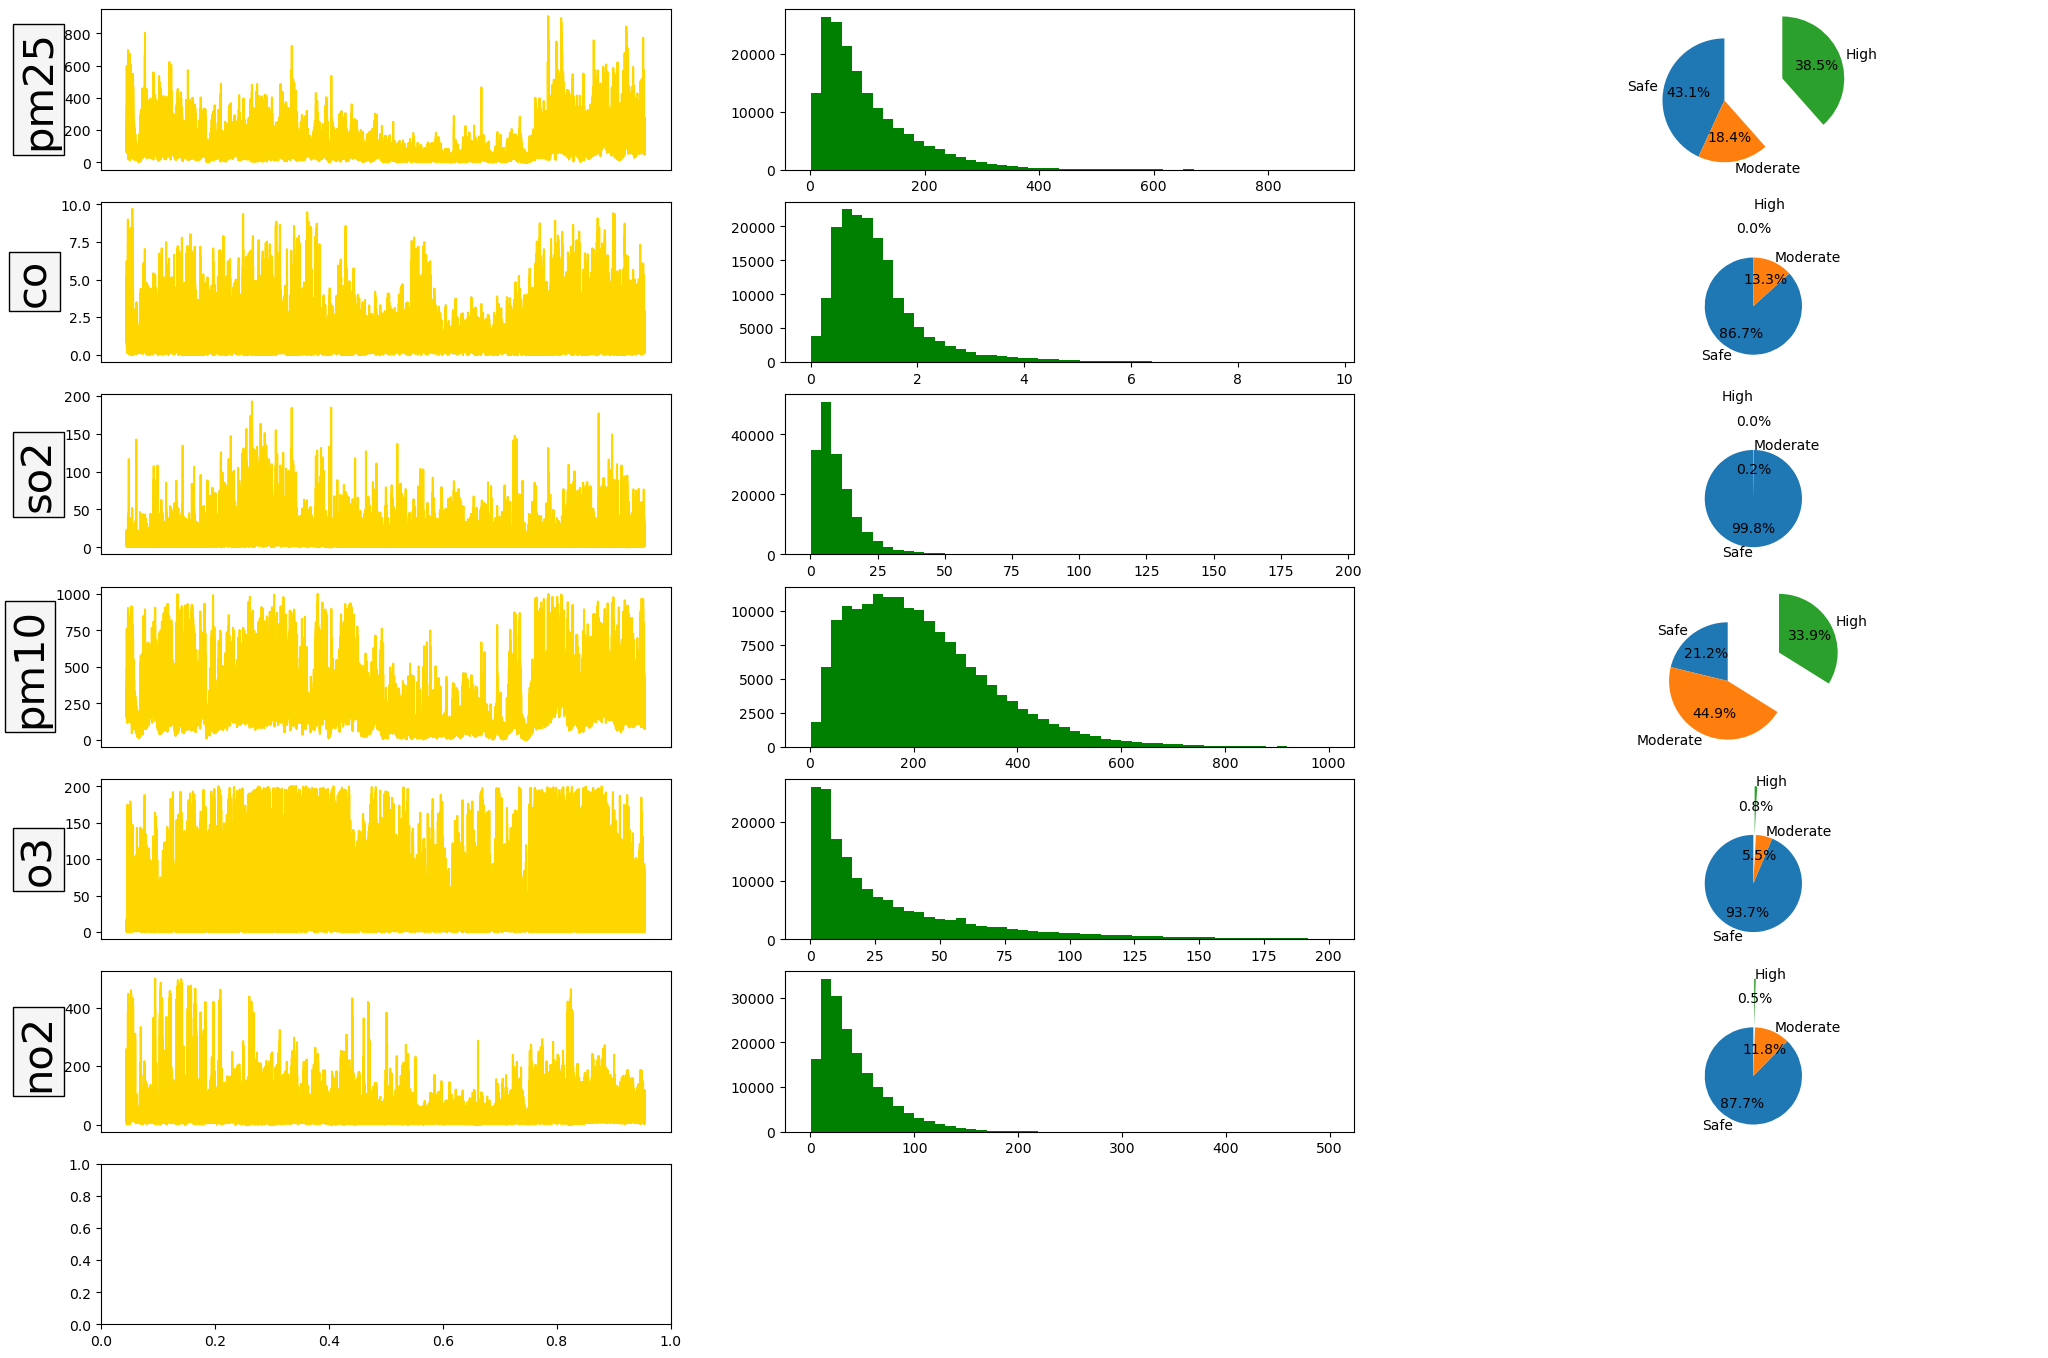

In [408]:
from vayu.summaryPlot import summaryPlot

print(df1.columns)




# Select the columns for plotting
benzene=df1
benzene = df1[['date','pm25', 'co', 'so2', 'no2', 'o3', 'pm10','no','nh3','benzene', 'toluene']]

benzene.dropna(inplace=True)
benzene.fillna(0, inplace=True)

summaryPlot(benzene)


for column in benzene.columns:
    try:
        # Call the summaryPlot function for the current column
        summaryPlot(benzene)
    except KeyError as e:
        if column == 'date':
            print(f"Error occurred for column '{column}': {str(e)}")
        else:
            continue
    except Exception as e:
        print(f"Error occurred for column '{column}': {str(e)}")
        continue



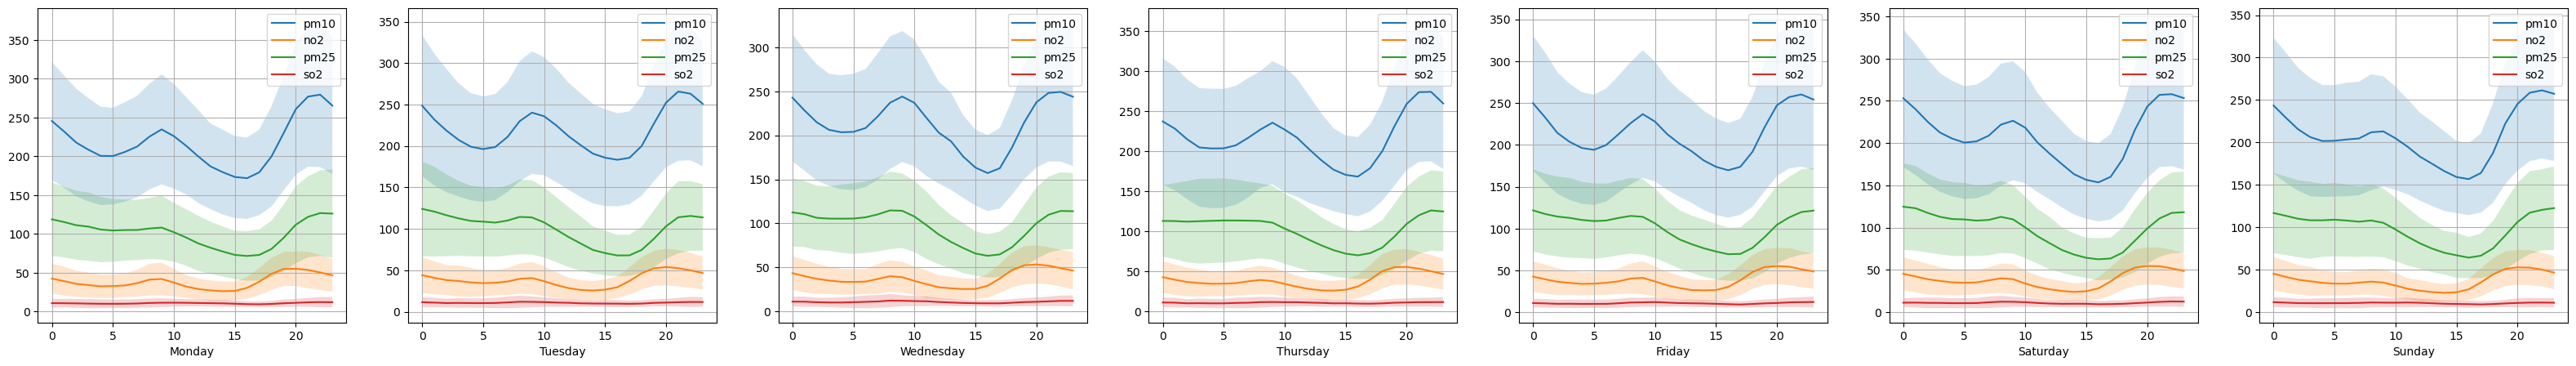

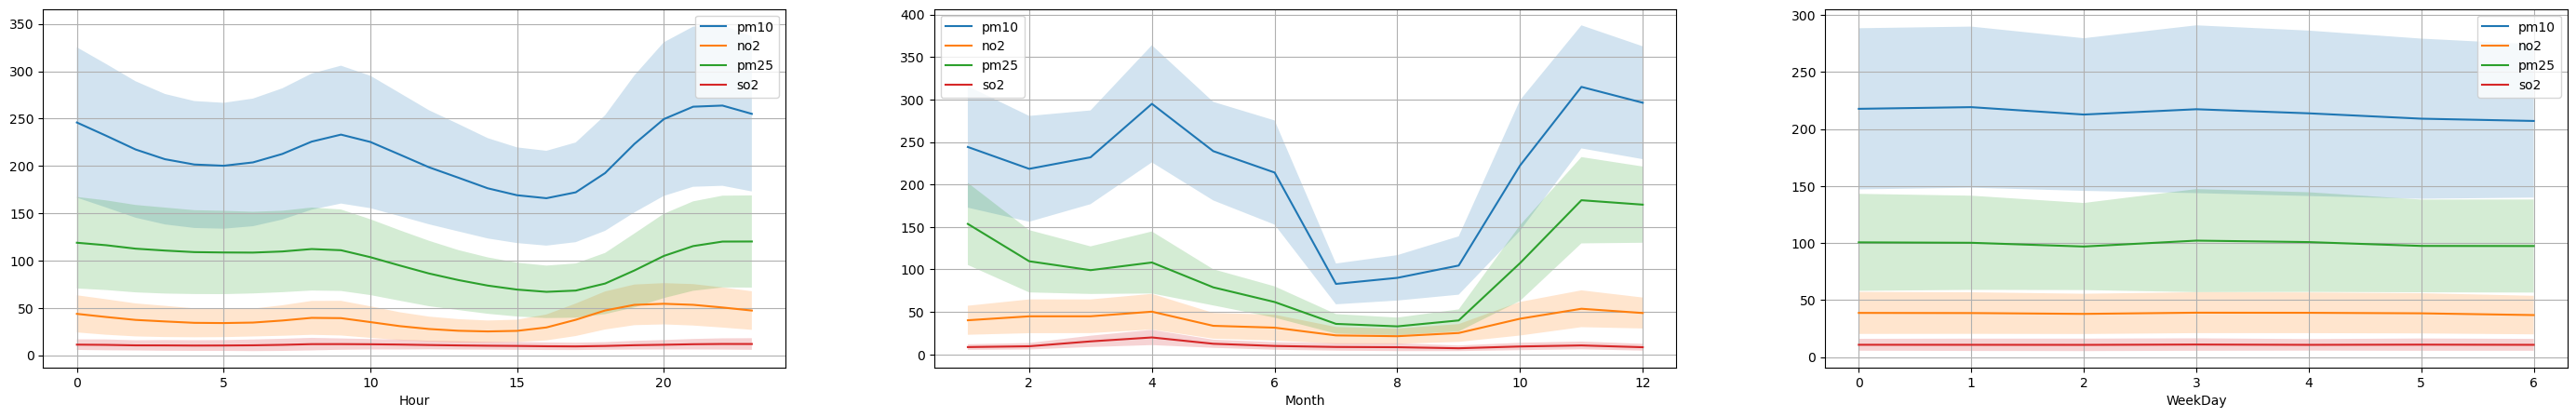

In [340]:
from vayu.timeVariation import timeVariation
timeVariation(df1, 'pm25')

ValueError: cannot reshape array of size 23 into shape (12,24)

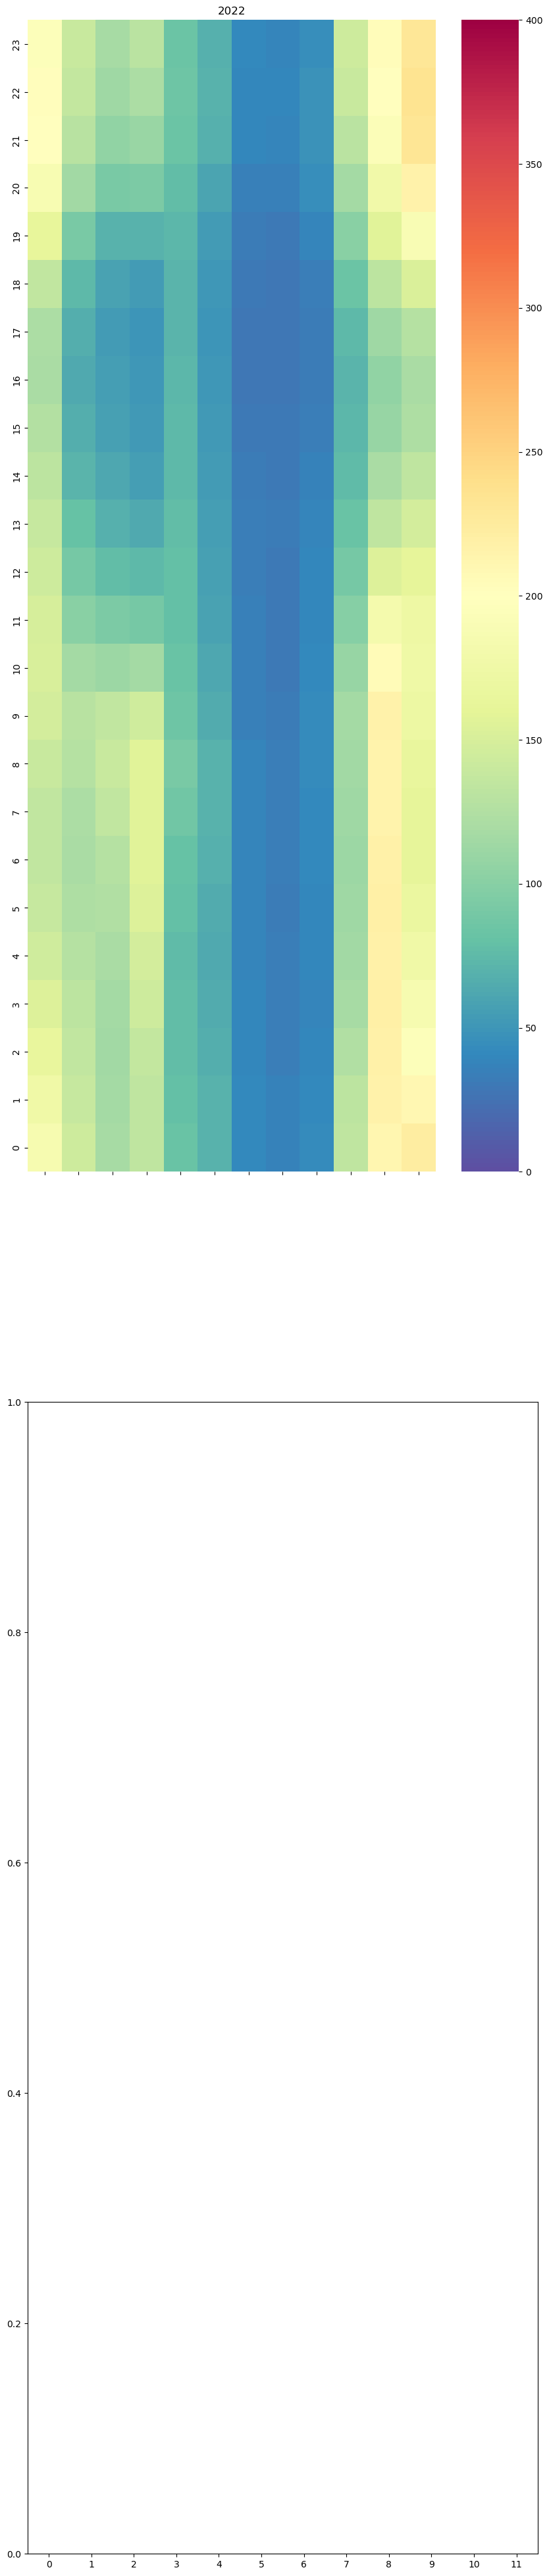

In [371]:
hourlydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\delhi_cpcb_2022.nc')
df1=hourlydata.to_dataframe()

df1.reset_index(inplace=True)
df1.columns = df1.columns.str.lower()
df1.rename(columns={'time':'date','pm2.5':'pm25','ozone':'o3'}, inplace=True)

from vayu.trendLevel import trendLevel
trendLevel(df1, 'pm25')

Index(['station', 'date', 'from date', 'to date', 'pm25', 'pm10', 'no', 'no2',
       'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene', 'rh', 'ws', 'wd',
       'sr', 'bp', 'at', 'rf', 'tot-rf', 'latitude', 'longitude'],
      dtype='object')
timeProp for pm10


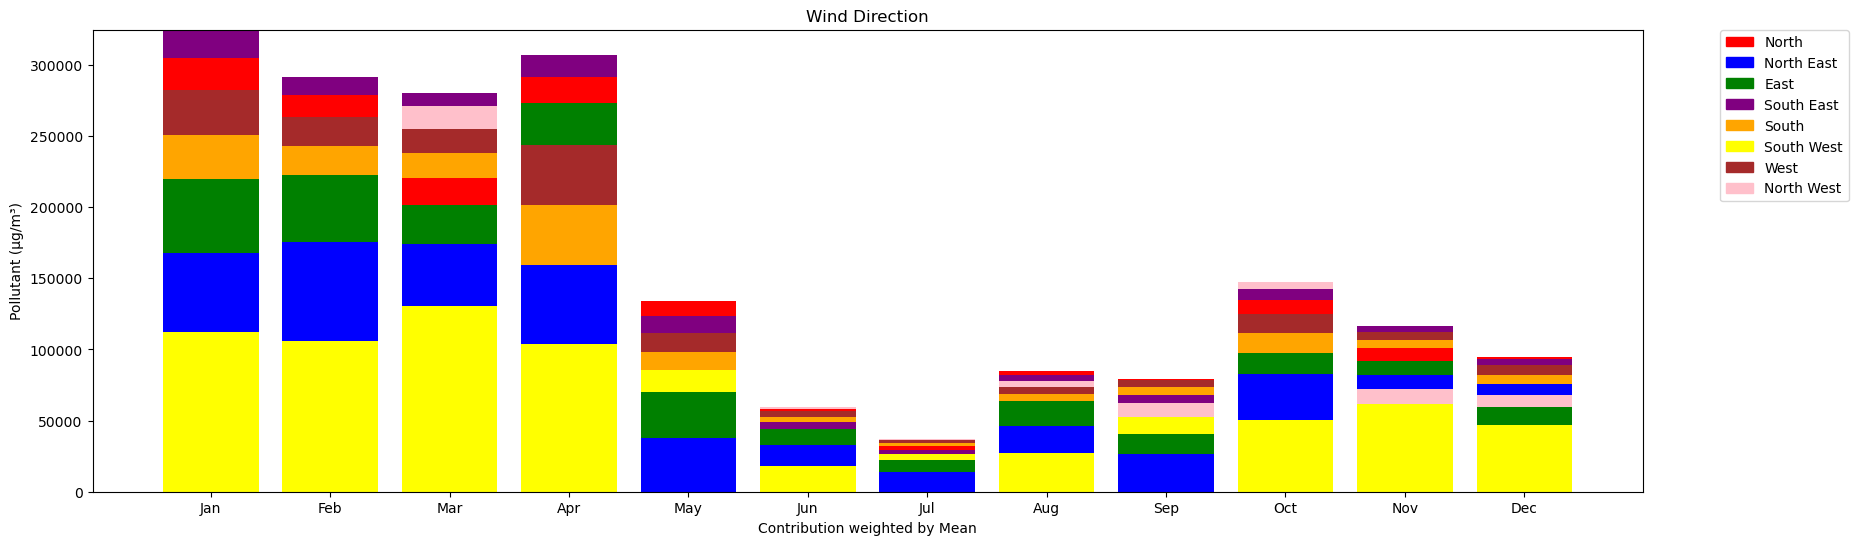

timeProp for no


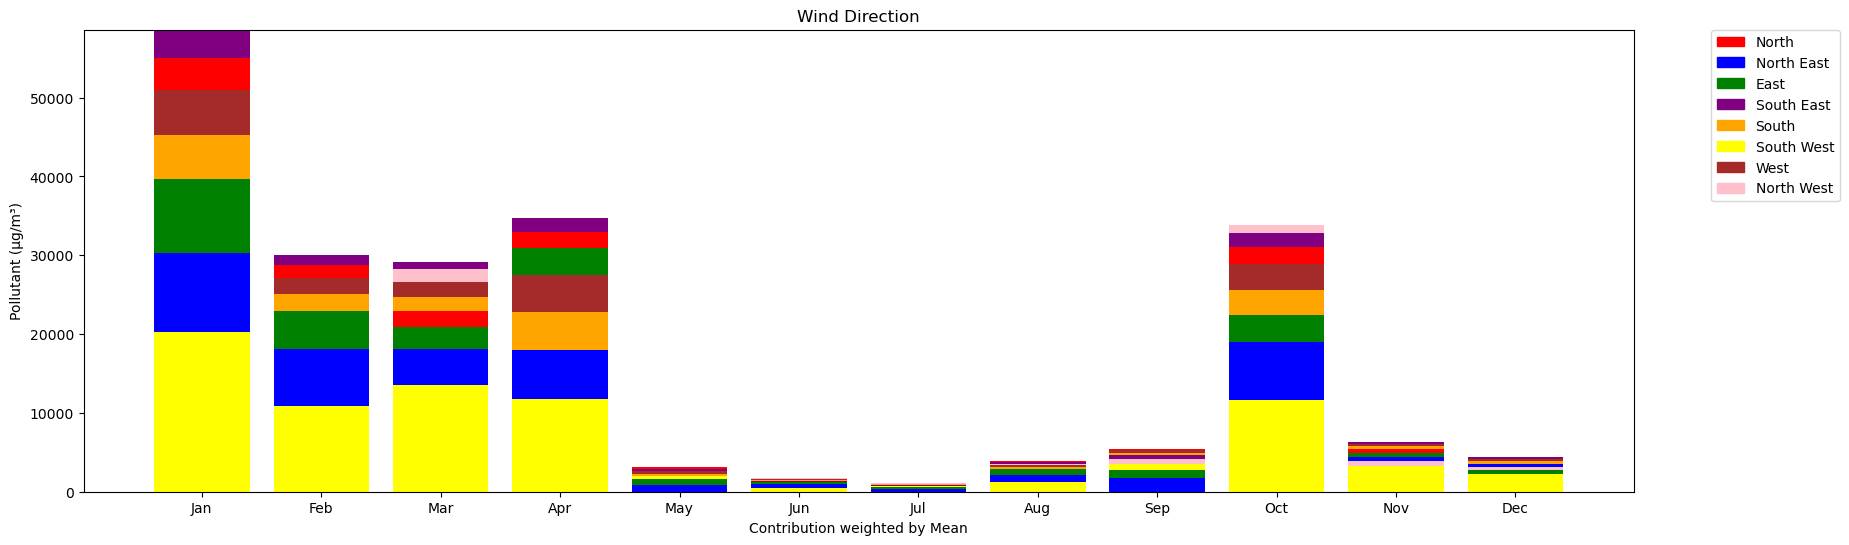

timeProp for no2


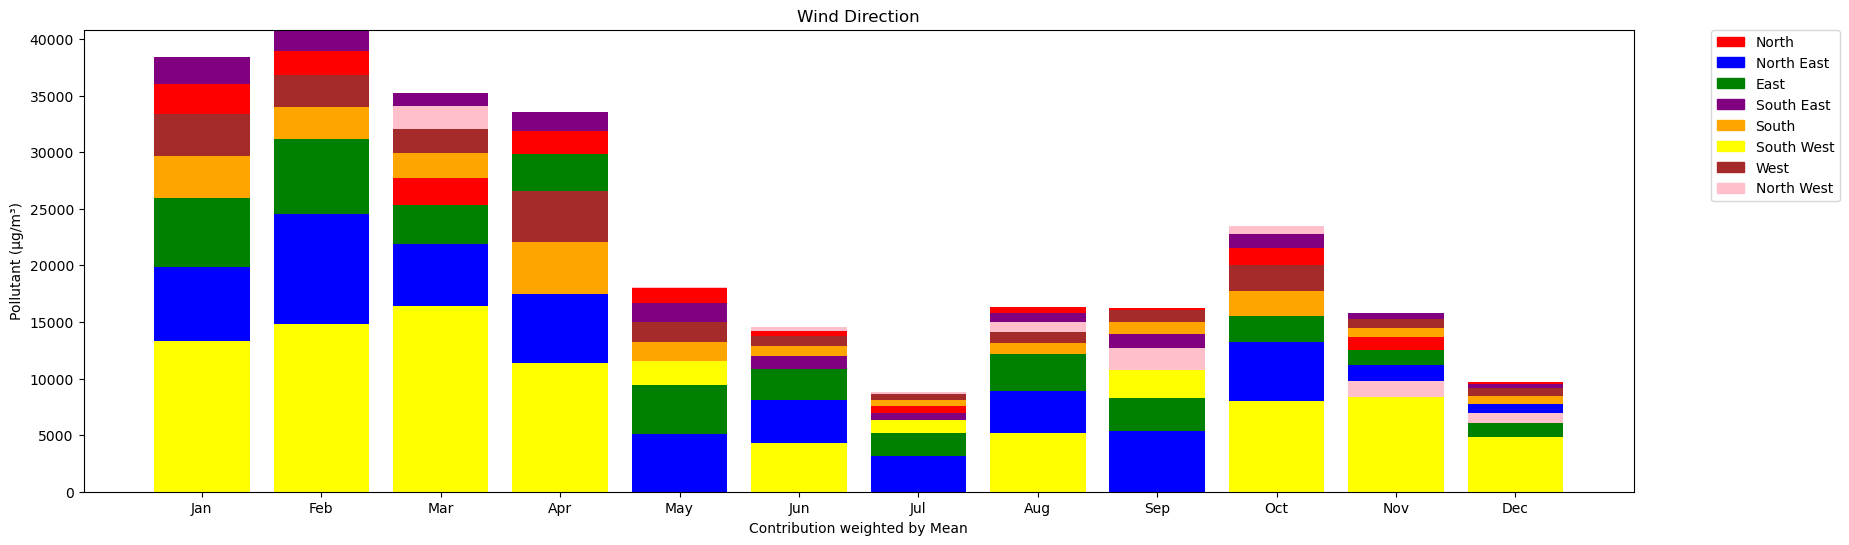

timeProp for nox


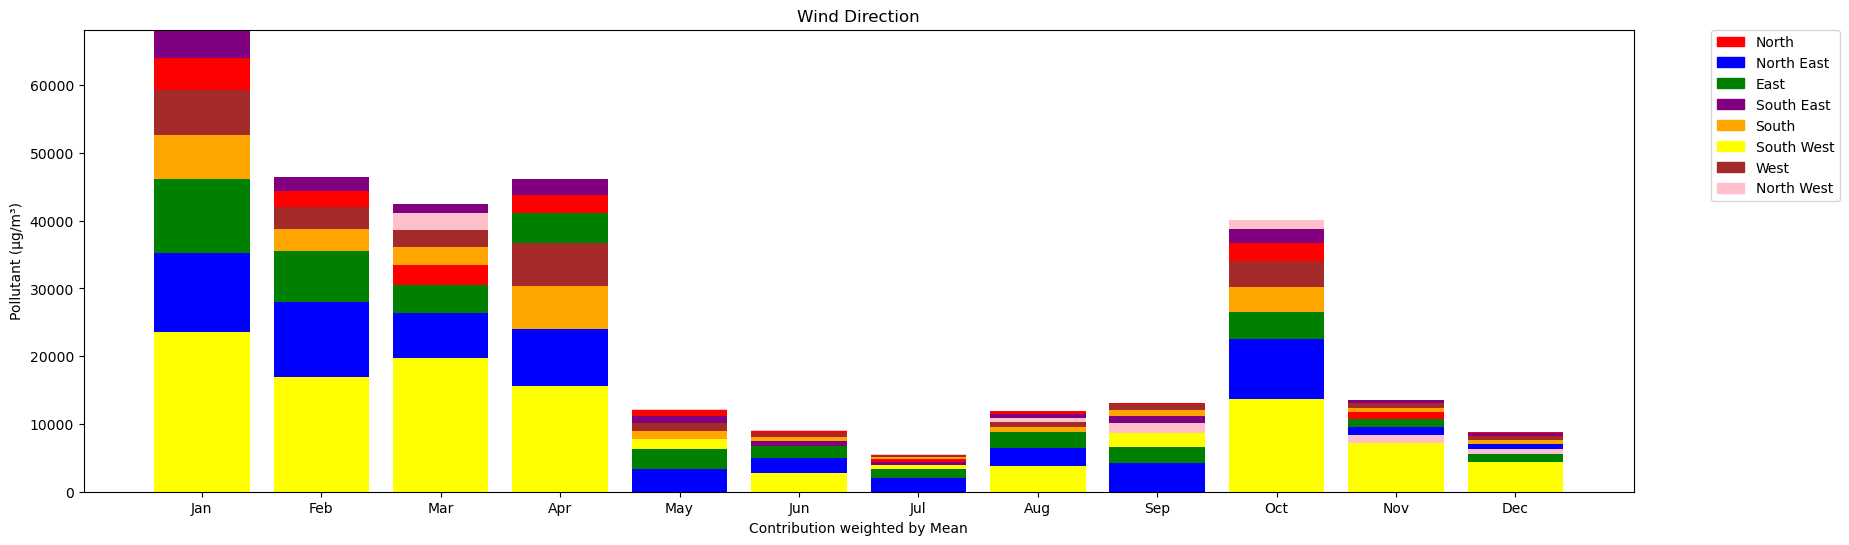

timeProp for nh3


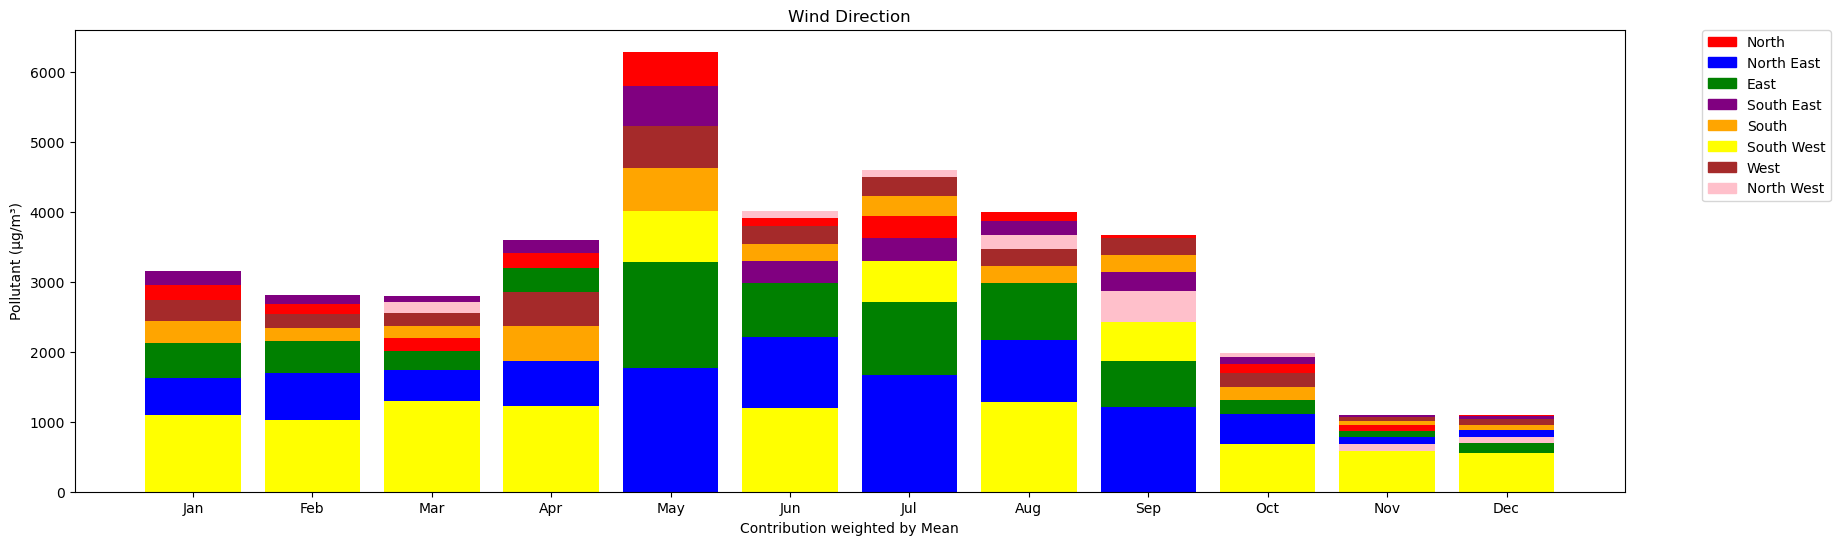

timeProp for so2


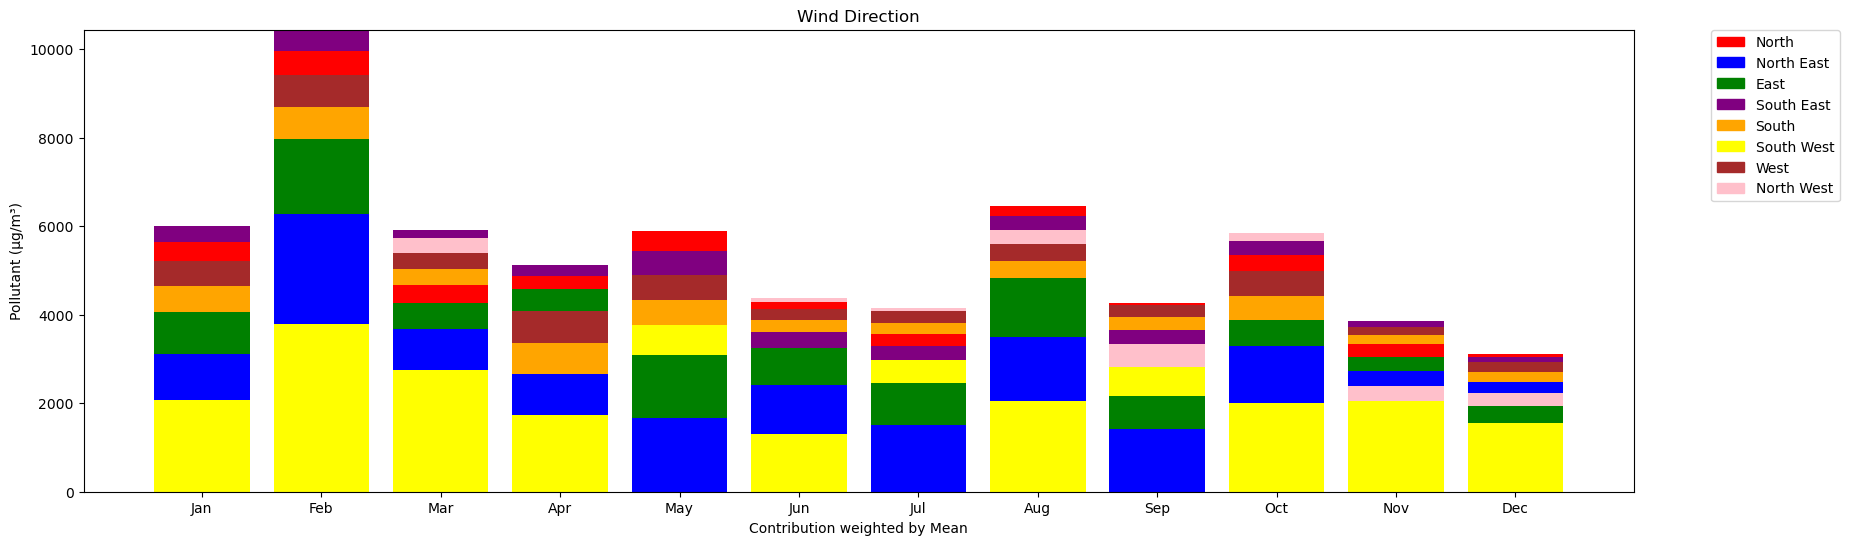

timeProp for co


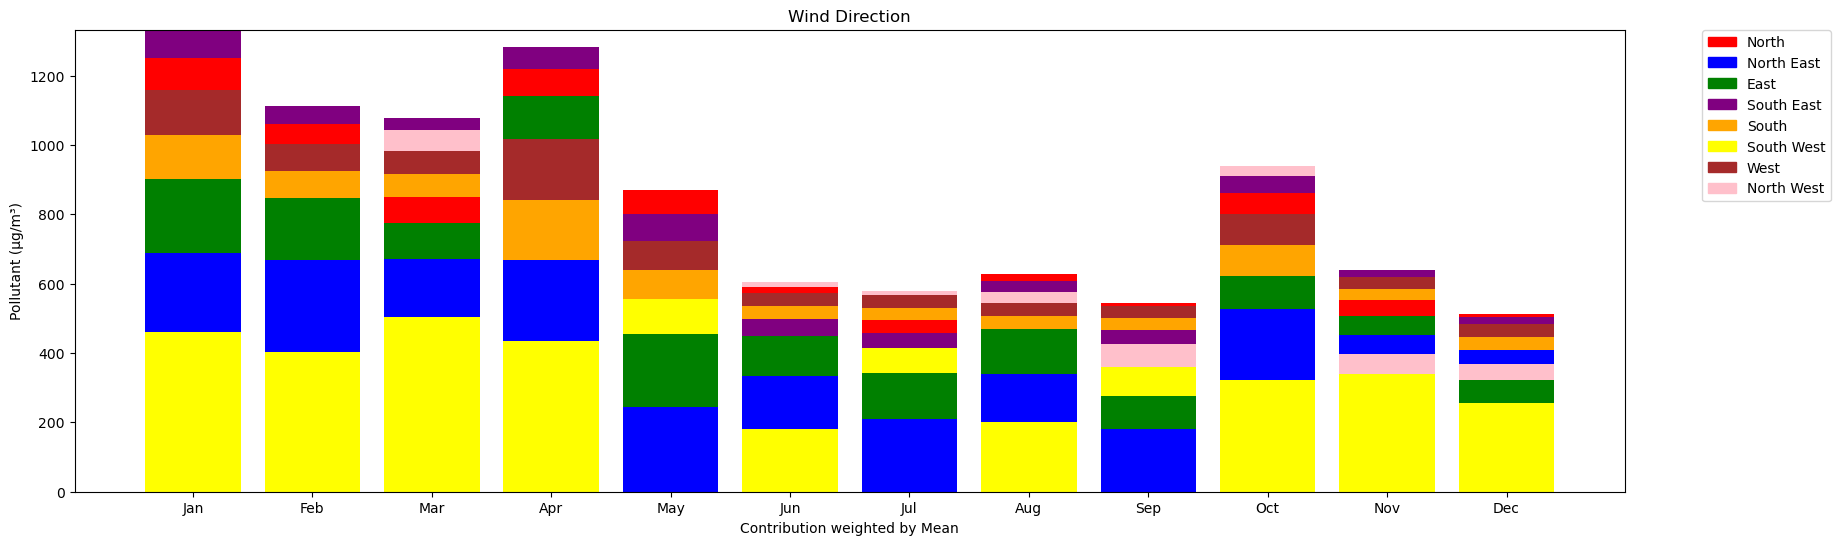

timeProp for o3


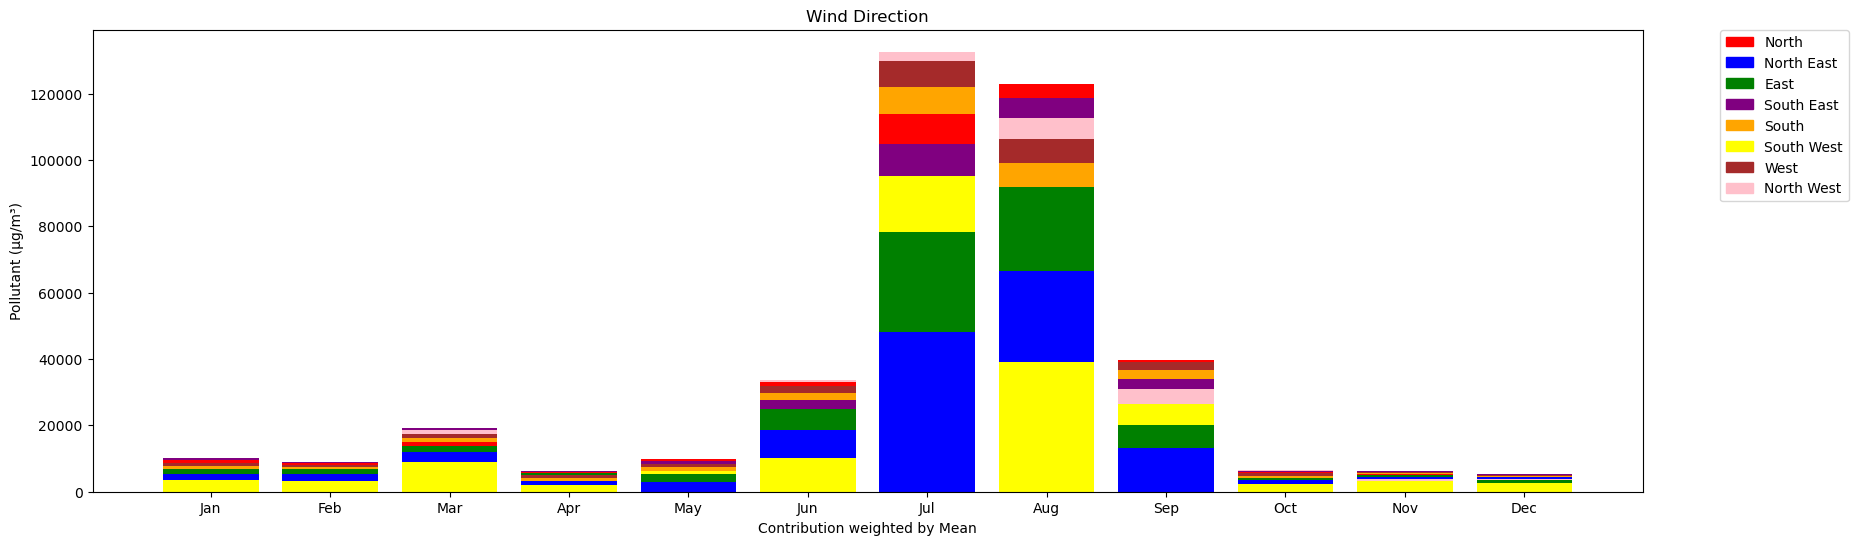

timeProp for benzene


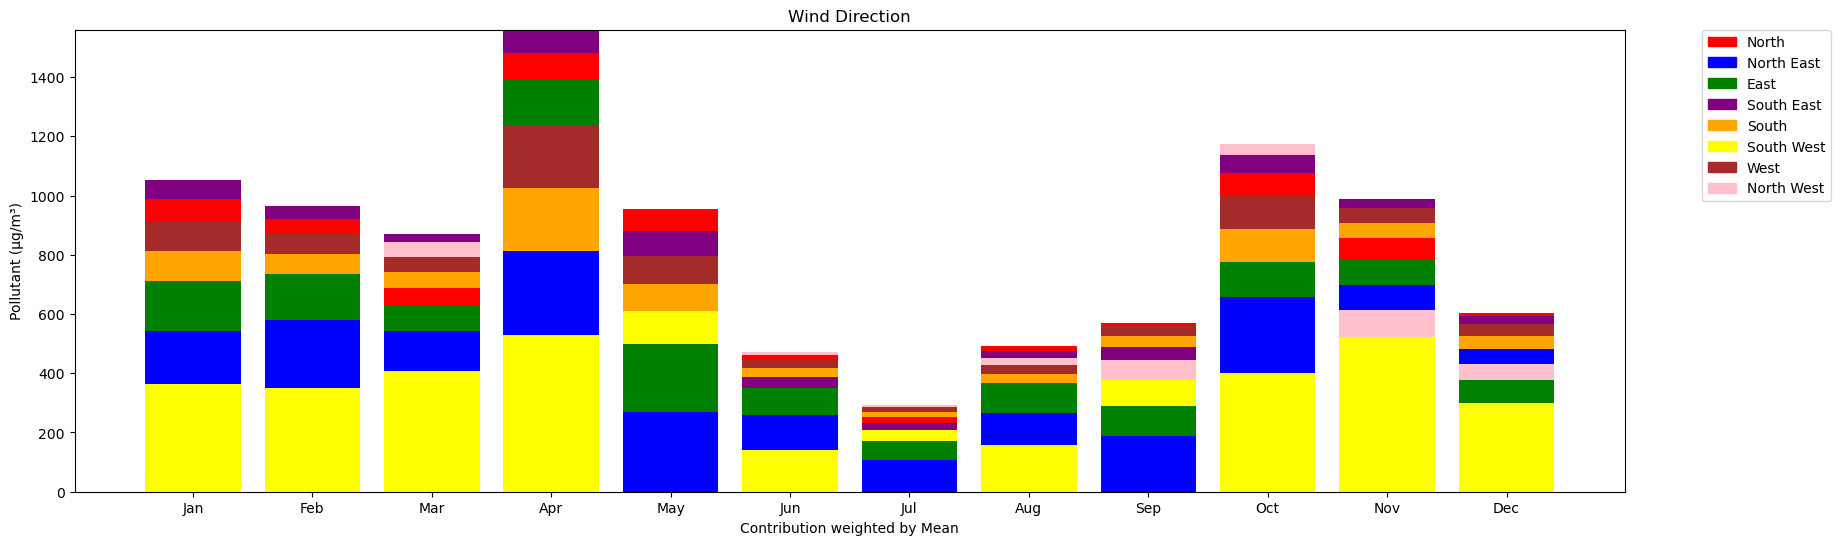

timeProp for toluene


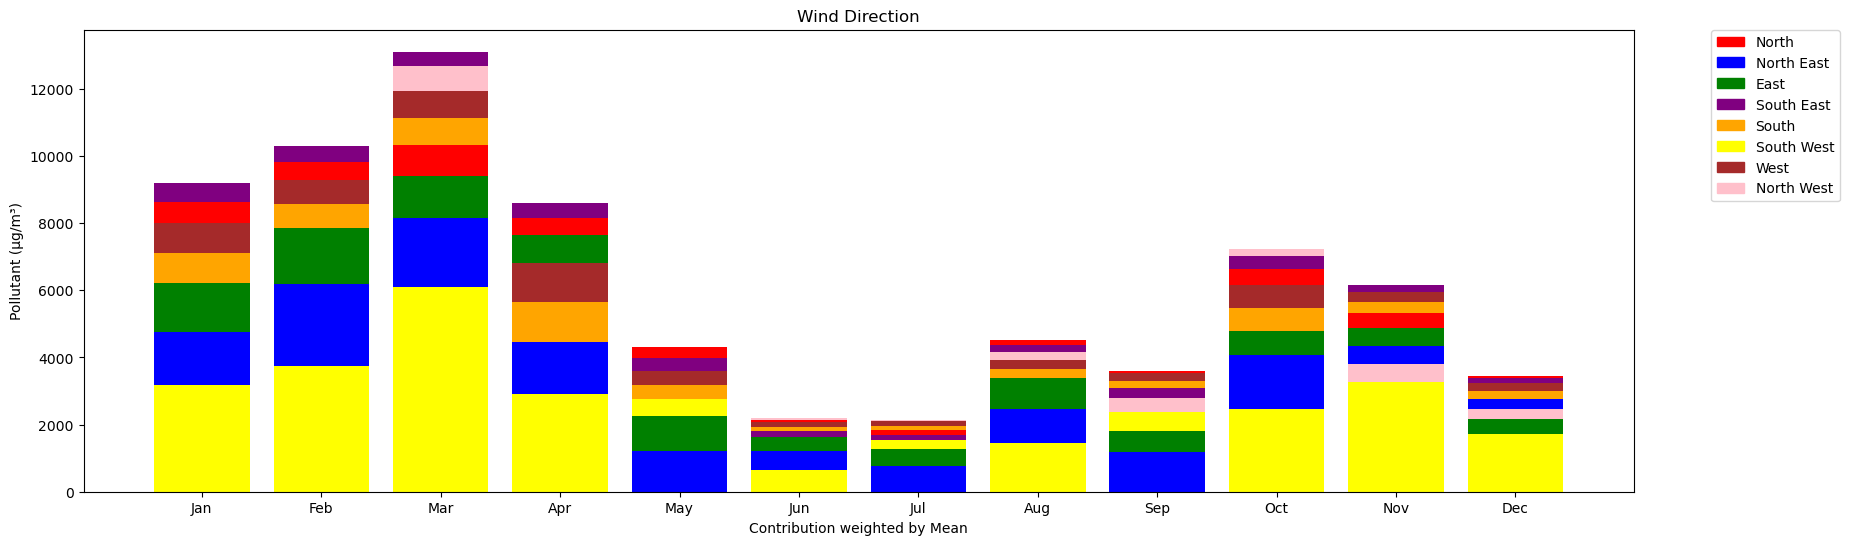

In [375]:
from vayu.timeProp import timeProp
print(df1.columns)
pollutants = ['pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene']
for i, pollutant in enumerate(pollutants):
    print('timeProp for',pollutant)
    timeProp(df1, '2022', pollutant, 30, 'date', sorted_bars=True)

<Axes: >

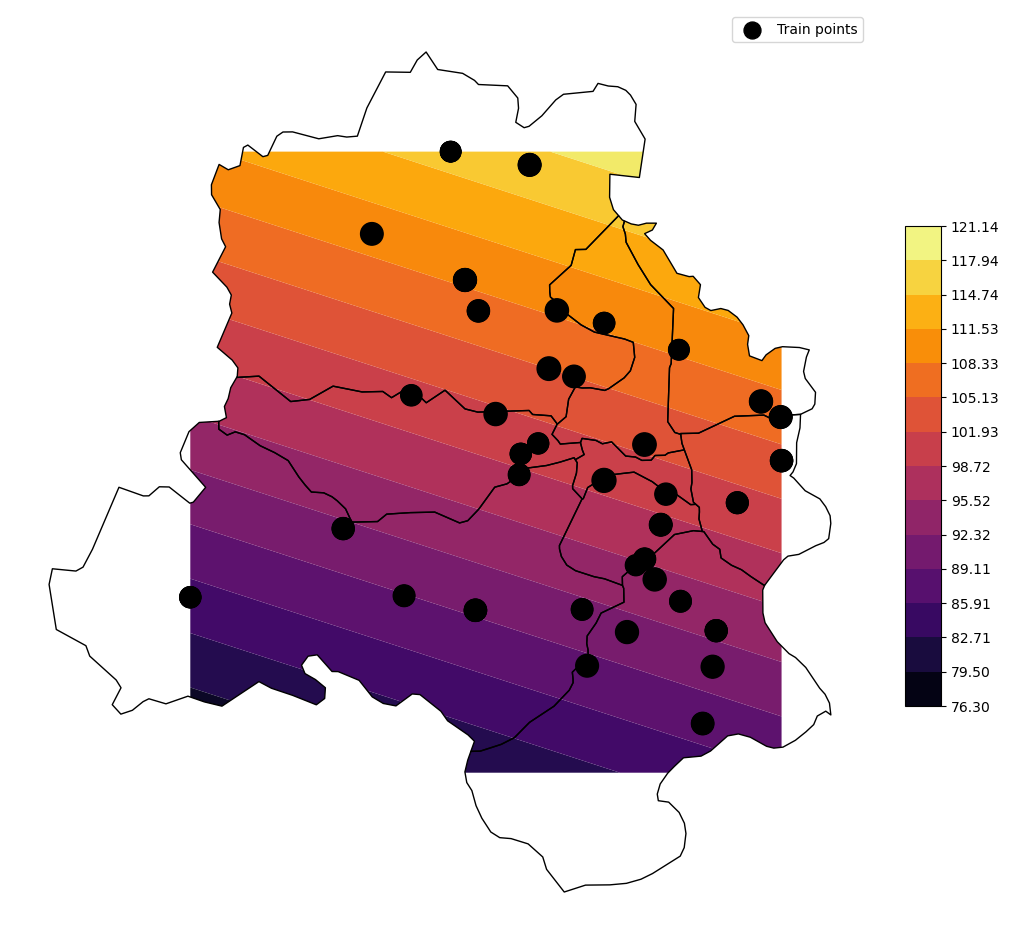

In [377]:
from vayu.interpolPlot import interpolPlot
from sklearn.linear_model import LinearRegression



interpolator = LinearRegression()


df1.dropna(subset=['pm25'],inplace=True)

interpolPlot(df1, gdf_shape, 'longitude','latitude', 'pm25', interpolator, resolution=50, partitions=15, cmap='inferno', Tcolor='k', markersize=0.3, plot_train_points=True, extrapolate=False)
#interpolPlot(df1, gdf_shape, x,y, 'pm25', interpolator, resolution=50, partitions=15, cmap='inferno', Tcolor='k', markersize=3, plot_train_points=False, extrapolate=False)

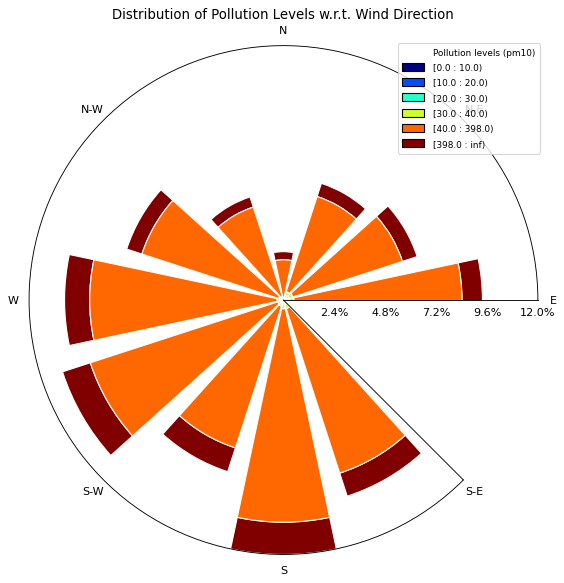

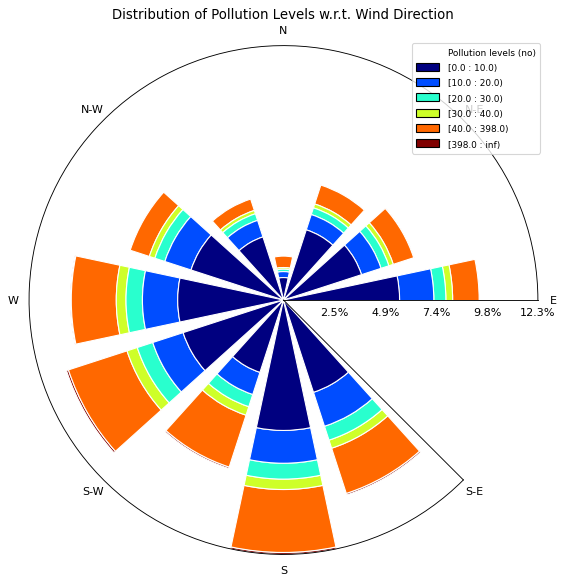

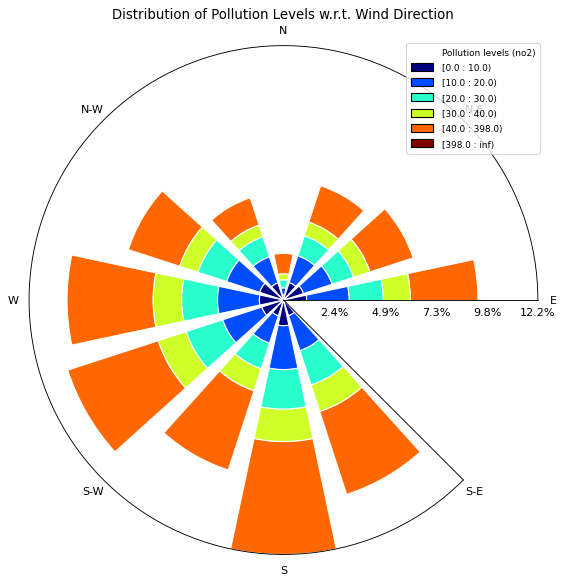

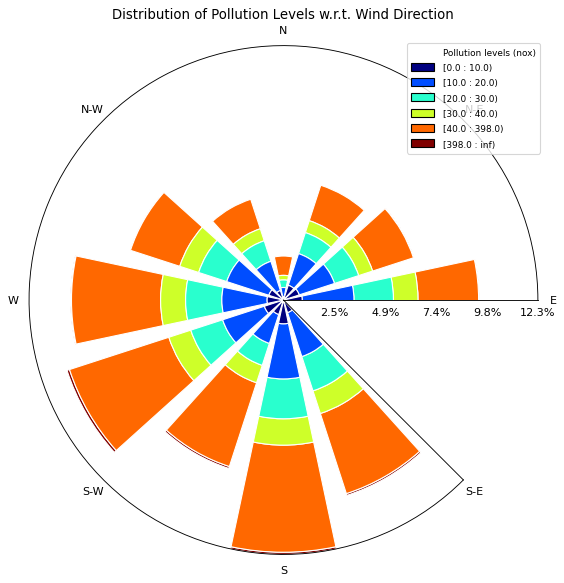

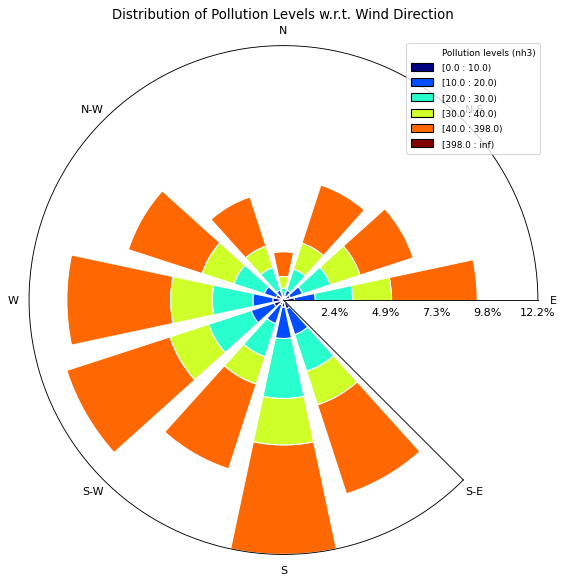

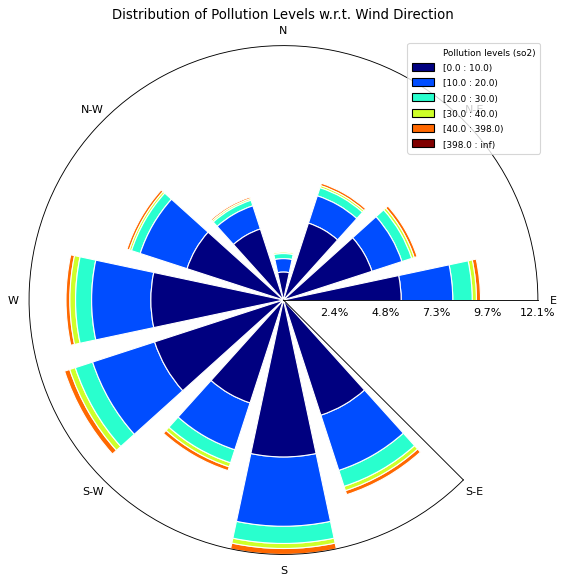

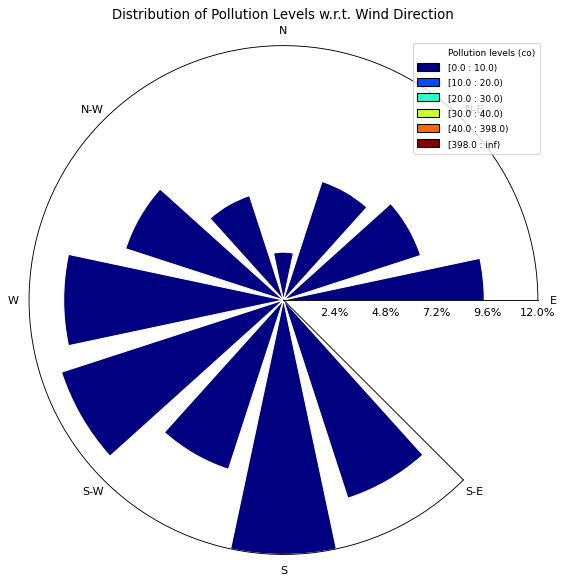

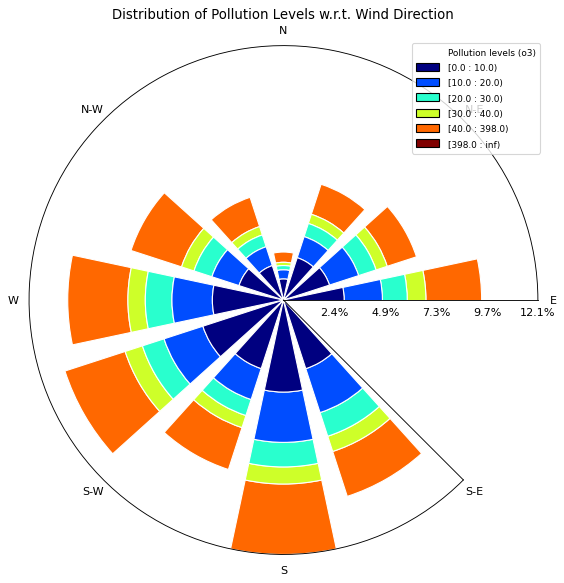

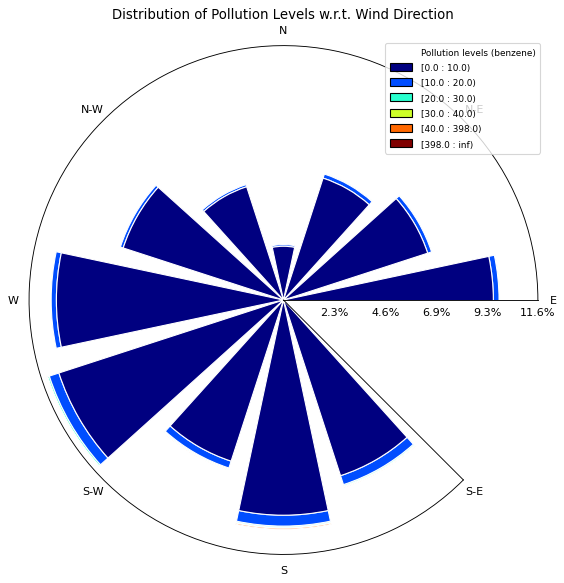

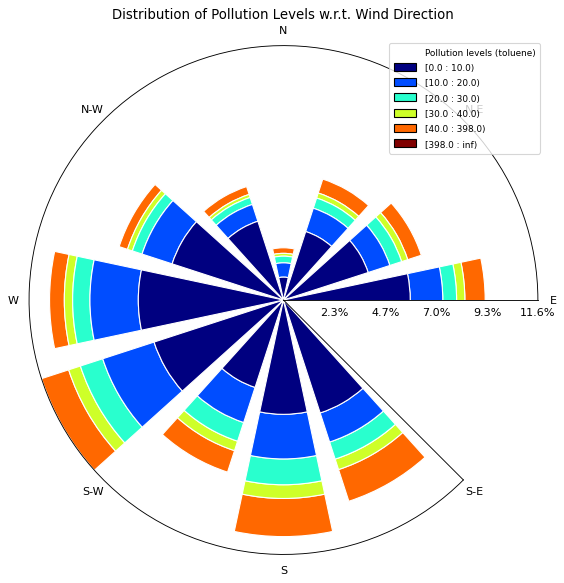

In [380]:
from vayu.pollutionRose import pollutionRose
pollutants = ['pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene']
for i, pollutant in enumerate(pollutants):
   
    pollutionRose(df1, pollutant)


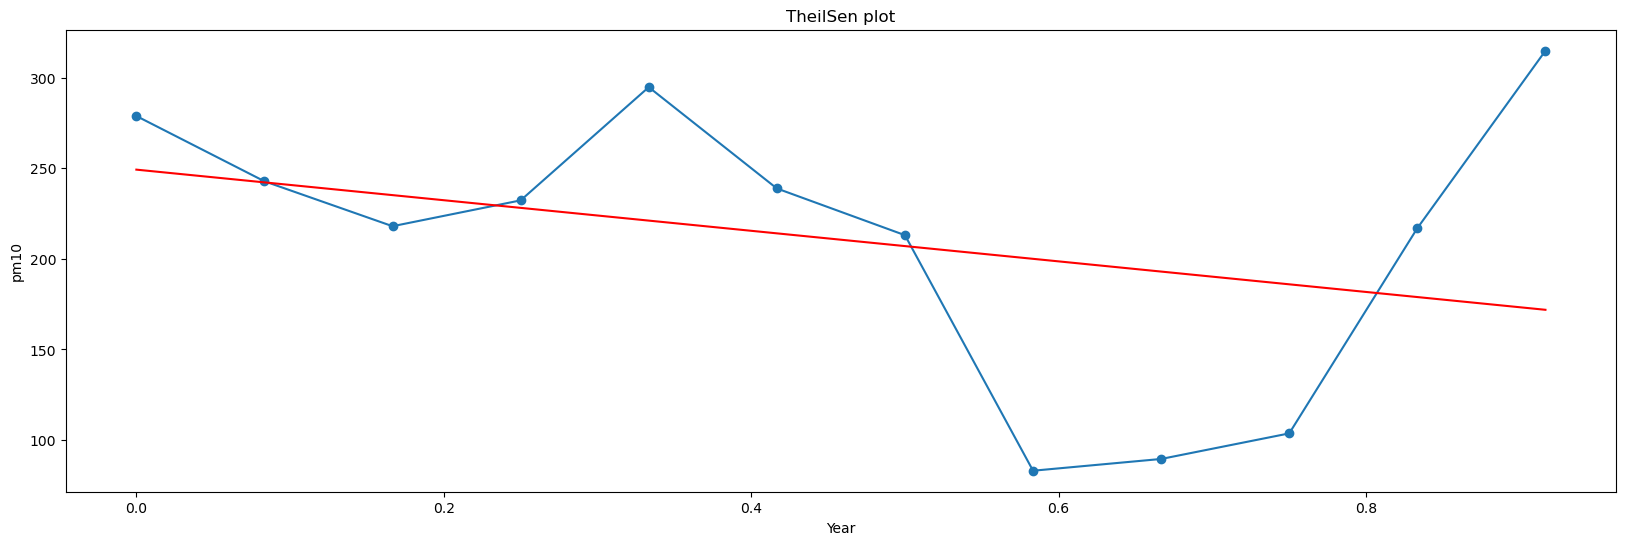

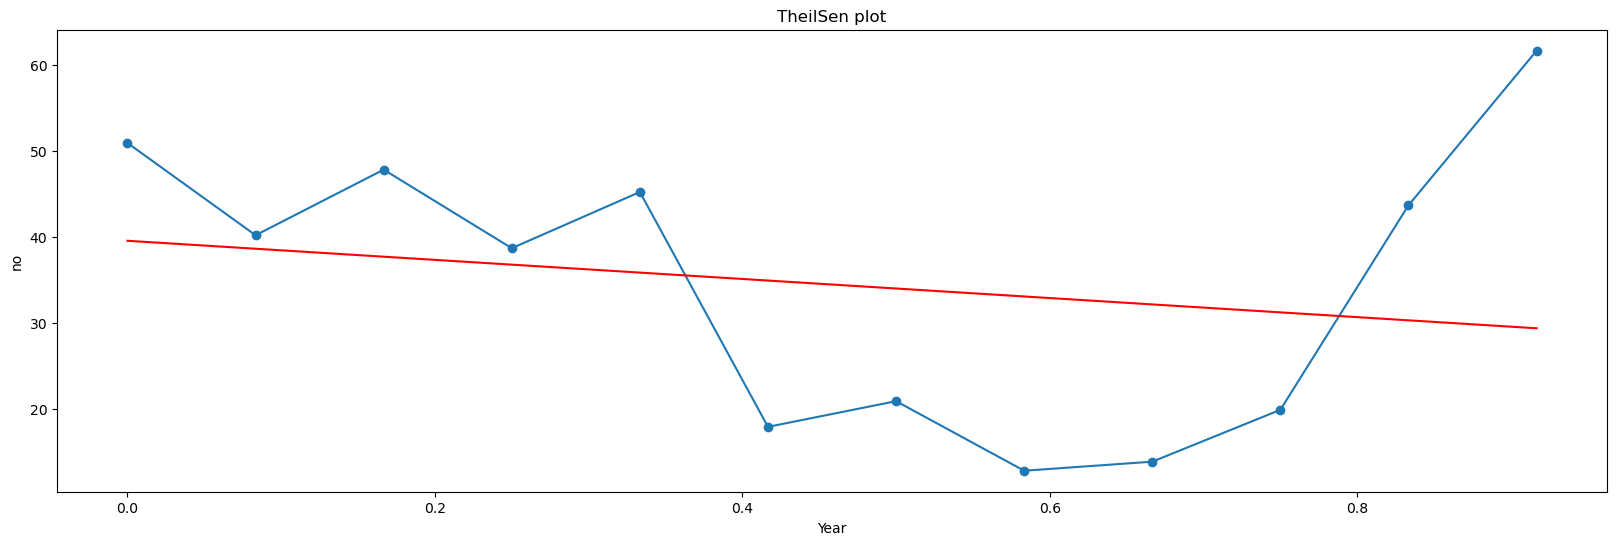

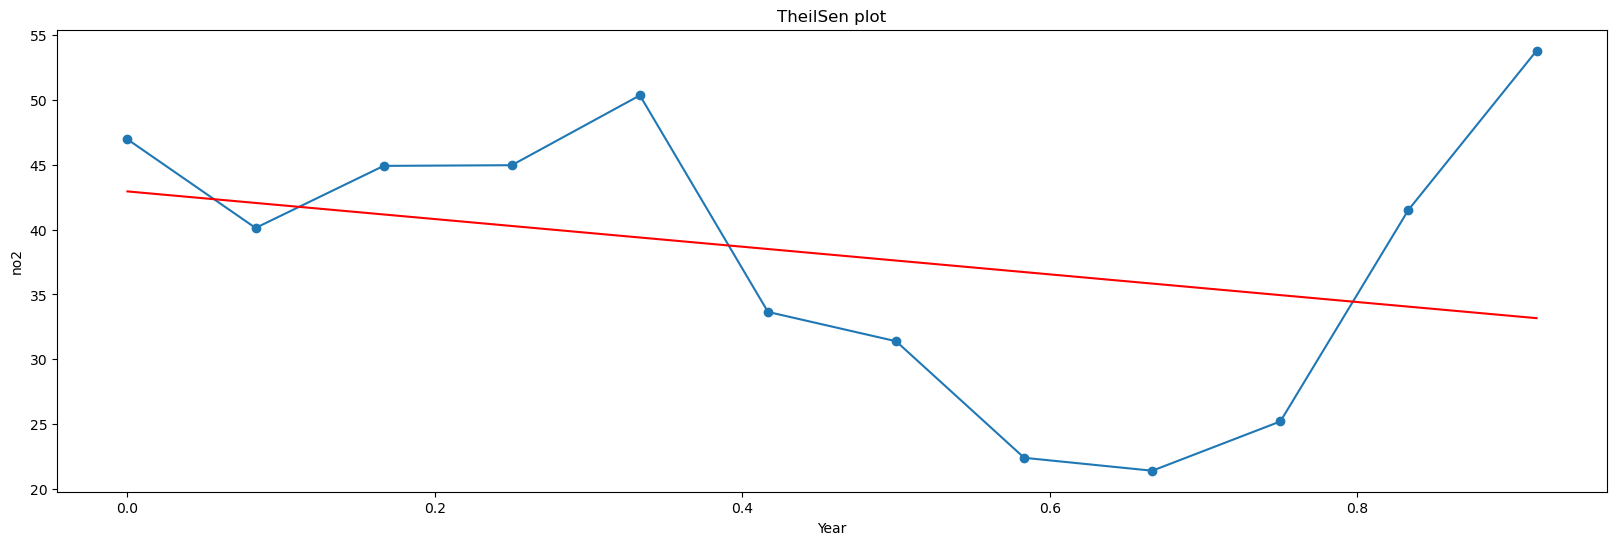

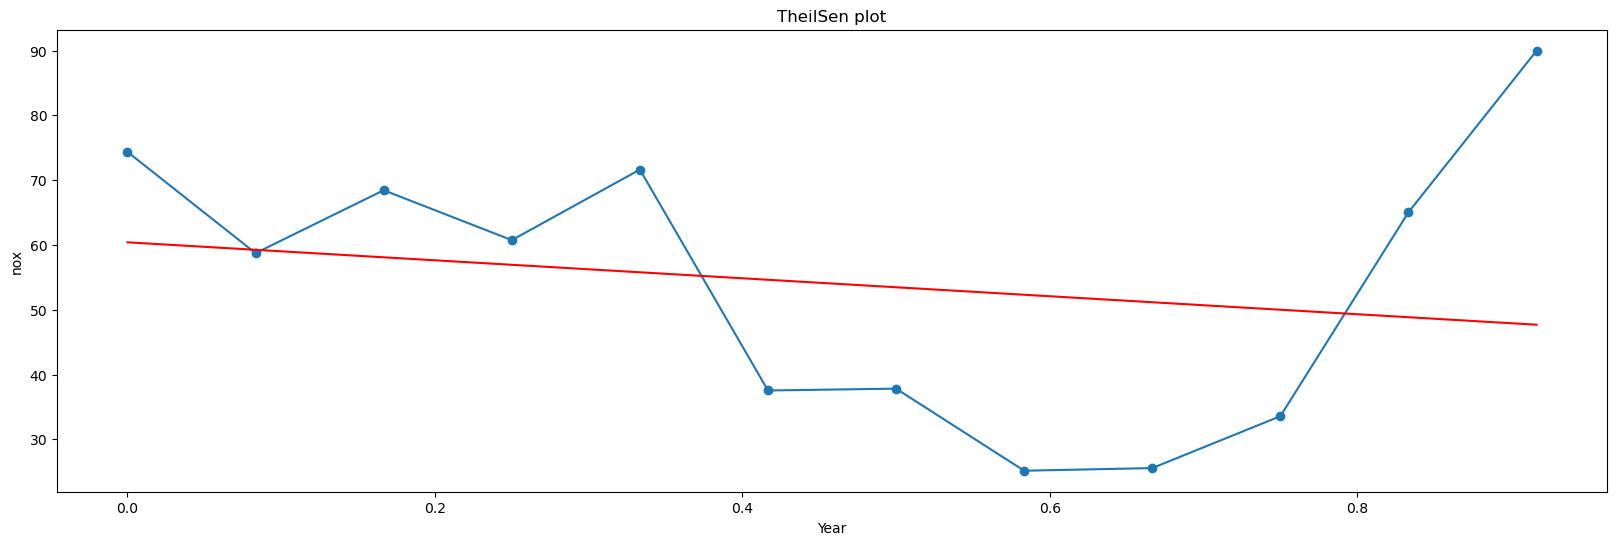

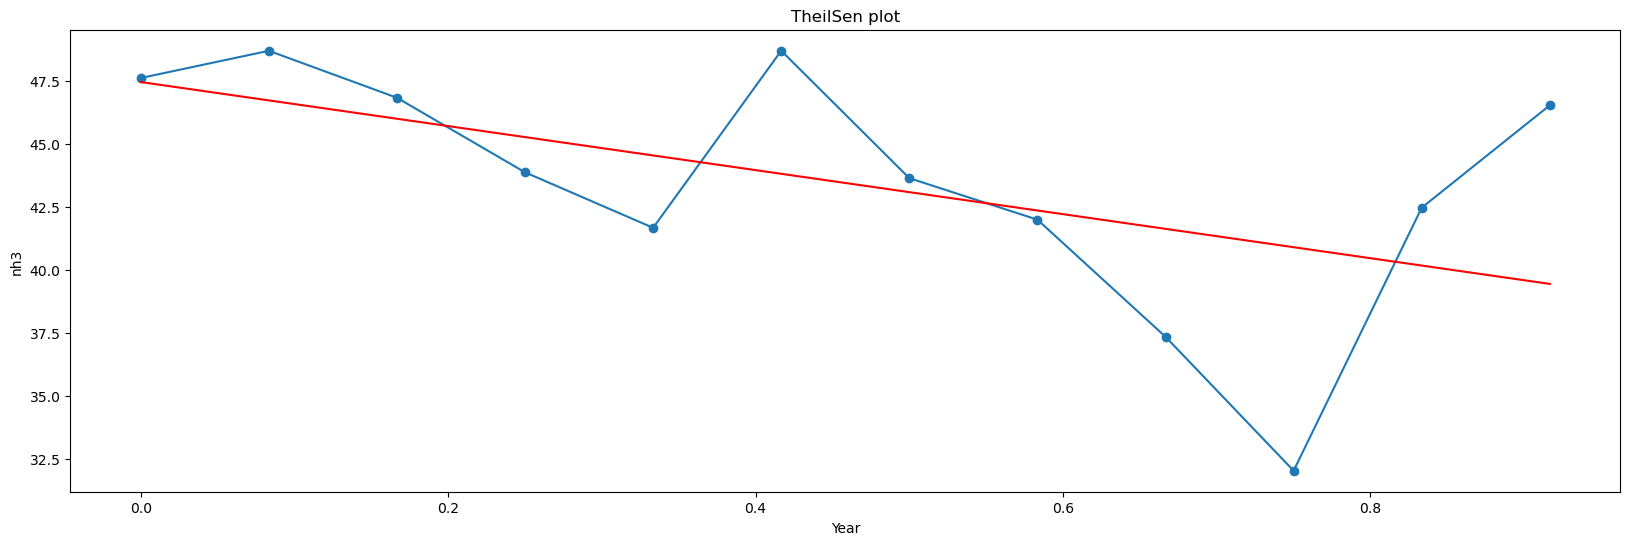

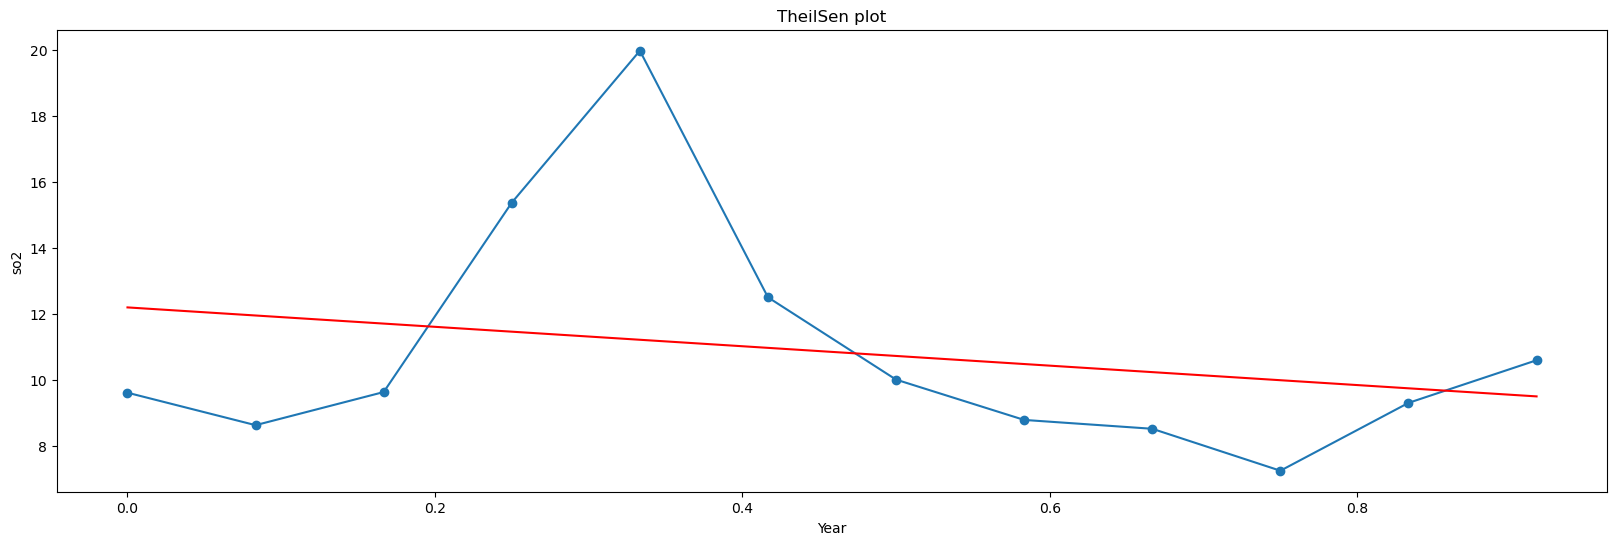

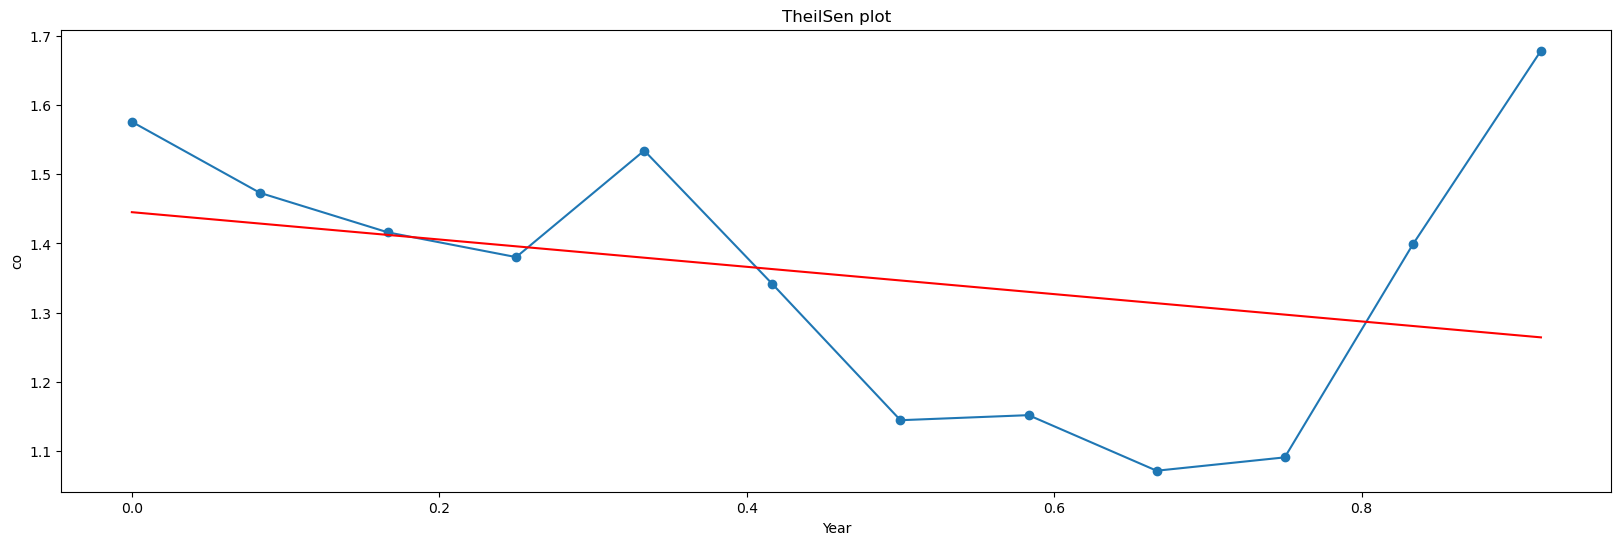

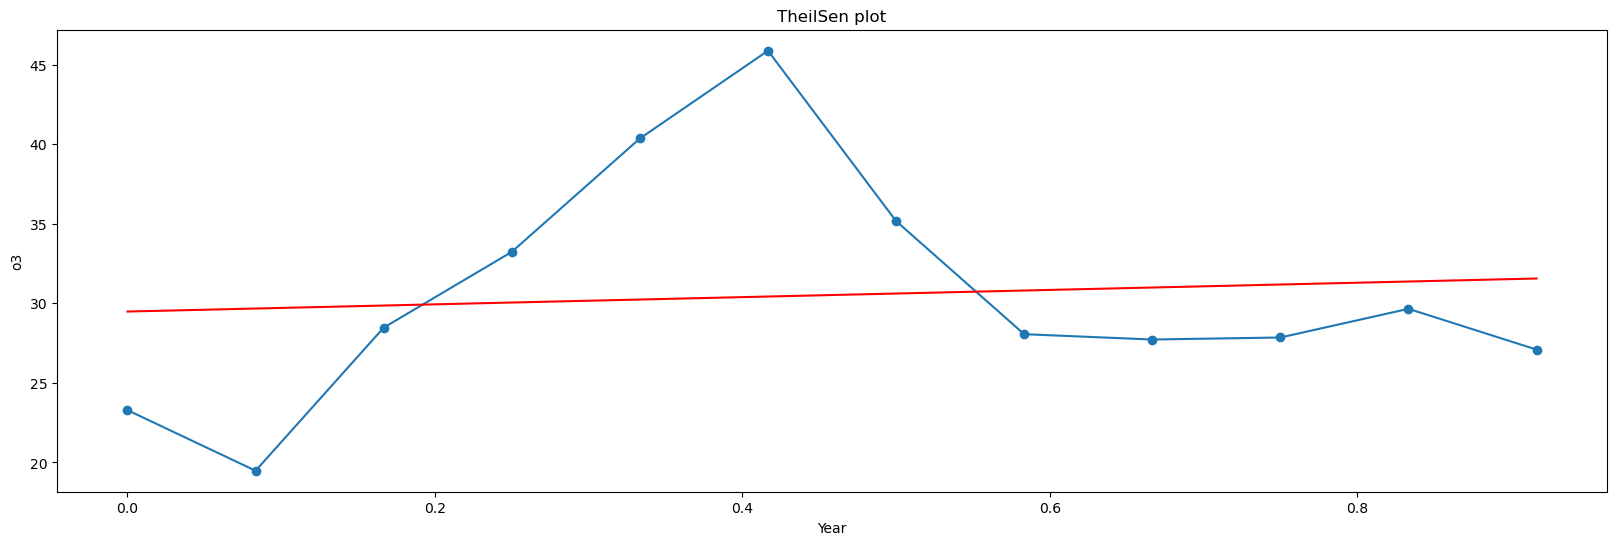

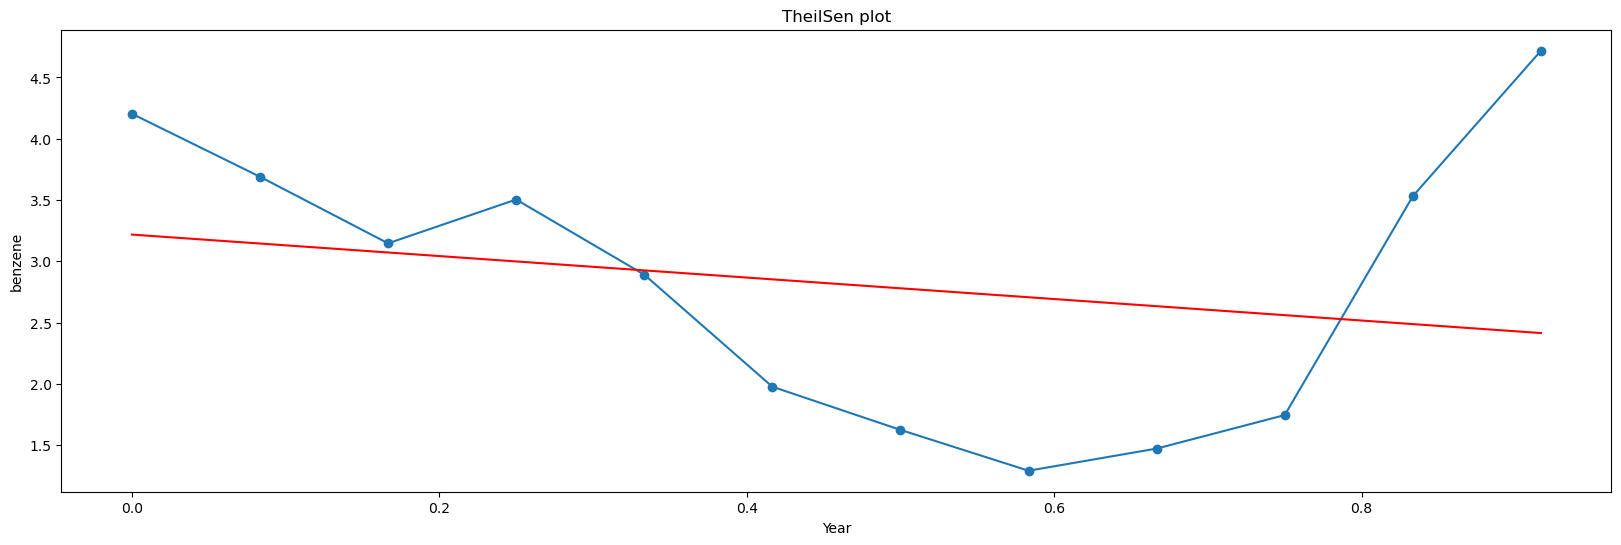

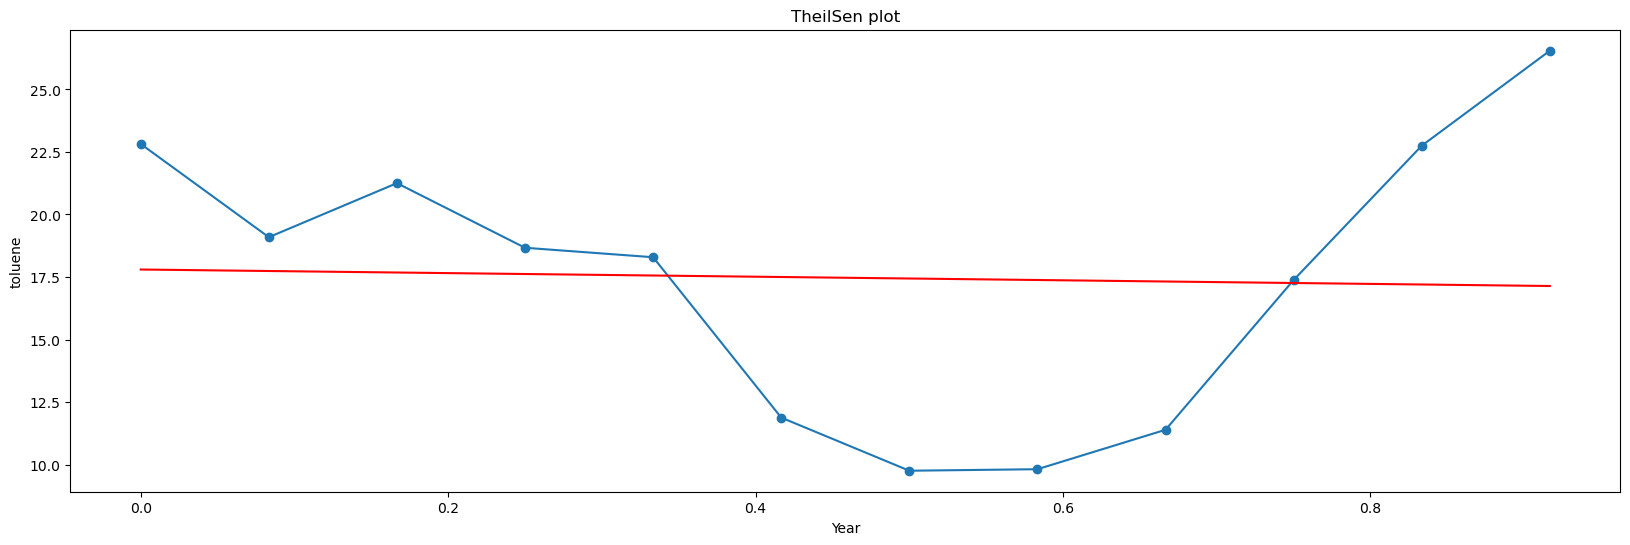

In [381]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from vayu.TheilSen import TheilSen

pollutants = ['pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene']
for i, pollutant in enumerate(pollutants):
   
   TheilSen(df1, pollutant)

In [382]:
from vayu.timeInteractiveScatterPlot import timeInteractiveScatterPlot
print(df1)
timeInteractiveScatterPlot(df1, 'date', 'station','pm25' , 'latitude', 'longitude', '2022-01-01 00:00:00', '2022-01-01 01:00:00', 1, width=800, height=660, location=[22, 82], zoom_start=4.5, control_scale=True, tiles='Stamen Terrain', min_lat=6, max_lat=105, min_lon=68, max_lon=97, period='PT1M', date_options='YYYY-MM-DD HH:mm')

                                   date                 station  \
date                                                              
2022-01-01 00:30:00 2022-01-01 00:30:00    Alipur, Delhi - DPCC   
2022-01-01 01:30:00 2022-01-01 01:30:00    Alipur, Delhi - DPCC   
2022-01-01 02:30:00 2022-01-01 02:30:00    Alipur, Delhi - DPCC   
2022-01-01 03:30:00 2022-01-01 03:30:00    Alipur, Delhi - DPCC   
2022-01-01 04:30:00 2022-01-01 04:30:00    Alipur, Delhi - DPCC   
...                                 ...                     ...   
2022-12-31 19:30:00 2022-12-31 19:30:00  Wazirpur, Delhi - DPCC   
2022-12-31 20:30:00 2022-12-31 20:30:00  Wazirpur, Delhi - DPCC   
2022-12-31 21:30:00 2022-12-31 21:30:00  Wazirpur, Delhi - DPCC   
2022-12-31 22:30:00 2022-12-31 22:30:00  Wazirpur, Delhi - DPCC   
2022-12-31 23:30:00 2022-12-31 23:30:00  Wazirpur, Delhi - DPCC   

                              from date             to date    pm25    pm10  \
date                                             

In [ ]:
https://weatherspark.com/y/109174/Average-Weather-in-New-Delhi-India-Year-Round
    